In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/2025 Sample Data BV.xlsx'

# Load your dataframes
orders_data = pd.read_excel('/content/2025 Sample Data BV.xlsx', sheet_name='Orders')
cancels_data = pd.read_excel('/content/2025 Sample Data BV.xlsx', sheet_name='Cancels')

# Create a composite key for grouping
orders_data['Composite_Key'] = (
    orders_data['STORE_NUM'].astype(str) + "_" +
    orders_data['ORDER_DT'].astype(str) + "_" +
    orders_data['ITEM_ID'].astype(str)
)

# Group by composite key and aggregate PLCD_QTY
orders_grouped = orders_data.groupby(
    ['STORE_NUM', 'ORDER_DT', 'ITEM_ID'], as_index=False
).agg({'PLCD_QTY': 'sum', 'PLCD_AMT': 'sum'})

print(orders_grouped)



       STORE_NUM   ORDER_DT     ITEM_ID  PLCD_QTY  PLCD_AMT
0             12 2024-02-01      994003         1      1.78
1             12 2024-02-01     1583440         5      9.30
2             12 2024-02-01     1780958         1      2.33
3             12 2024-02-01     2493042         5     26.40
4             12 2024-02-01     3441974         4      6.88
...          ...        ...         ...       ...       ...
58602       6530 2024-06-23   211094676         2      4.48
58603       6530 2024-06-23   248848736        19    101.51
58604       6530 2024-06-23   259105048         1      6.77
58605       6530 2024-06-23   519077391         2      5.72
58606       6530 2024-06-23  1156552504         1      3.72

[58607 rows x 5 columns]


In [ ]:
unmatched_orders = joined_data[joined_data['CNCL_QTY'].isna()]
print(f"Number of unmatched rows: {len(unmatched_orders)}")


Number of unmatched rows: 0


In [ ]:

Inventory = pd.read_excel(file_path, sheet_name='Inventory')
Store = pd.read_excel(file_path, sheet_name='Store')
Product = pd.read_excel(file_path, sheet_name='Product')
Calendar = pd.read_excel(file_path, sheet_name='Calendar')

In [ ]:


# Perform an inner join on STORE_NUM, ORDER_DT, and ITEM_ID
joined_data = pd.merge(
    orders_grouped,
    cancels_data,
    on=['STORE_NUM', 'ORDER_DT', 'ITEM_ID'],
    how='left'
)

joined_data['CNCL_QTY'] = joined_data['CNCL_QTY'].fillna(0)
joined_data['CNCL_AMT'] = joined_data['CNCL_AMT'].fillna(0)

print(joined_data)





       STORE_NUM   ORDER_DT     ITEM_ID  PLCD_QTY  PLCD_AMT CANCEL_DT  \
0             12 2024-02-01      994003         1      1.78       NaT   
1             12 2024-02-01     1583440         5      9.30       NaT   
2             12 2024-02-01     1780958         1      2.33       NaT   
3             12 2024-02-01     2493042         5     26.40       NaT   
4             12 2024-02-01     3441974         4      6.88       NaT   
...          ...        ...         ...       ...       ...       ...   
60199       6530 2024-06-23   211094676         2      4.48       NaT   
60200       6530 2024-06-23   248848736        19    101.51       NaT   
60201       6530 2024-06-23   259105048         1      6.77       NaT   
60202       6530 2024-06-23   519077391         2      5.72       NaT   
60203       6530 2024-06-23  1156552504         1      3.72       NaT   

      CNCL_RSN_DESC CNCL_RSN_SUB_DESC  CNCL_QTY  CNCL_AMT  
0               NaN               NaN       0.0       0.0  
1  

In [ ]:
# Calculate cancel percentage
joined_data['Cancel_Percentage'] = (joined_data['CNCL_QTY'] / joined_data['PLCD_QTY']) * 100

# Display the resulting data
print(joined_data)

joined_data['CNCL_QTY'] = joined_data['CNCL_QTY'].fillna(0)
joined_data['CNCL_AMT'] = joined_data['CNCL_AMT'].fillna(0)



       STORE_NUM   ORDER_DT     ITEM_ID  PLCD_QTY  PLCD_AMT CANCEL_DT  \
0             12 2024-02-01      994003         1      1.78       NaT   
1             12 2024-02-01     1583440         5      9.30       NaT   
2             12 2024-02-01     1780958         1      2.33       NaT   
3             12 2024-02-01     2493042         5     26.40       NaT   
4             12 2024-02-01     3441974         4      6.88       NaT   
...          ...        ...         ...       ...       ...       ...   
60199       6530 2024-06-23   211094676         2      4.48       NaT   
60200       6530 2024-06-23   248848736        19    101.51       NaT   
60201       6530 2024-06-23   259105048         1      6.77       NaT   
60202       6530 2024-06-23   519077391         2      5.72       NaT   
60203       6530 2024-06-23  1156552504         1      3.72       NaT   

      CNCL_RSN_DESC CNCL_RSN_SUB_DESC  CNCL_QTY  CNCL_AMT  Cancel_Percentage  
0               NaN               NaN       

In [ ]:
total_cancel_qty_cancelled = joined_data['CNCL_QTY'].sum()
total_qty_ordered = orders_grouped['PLCD_QTY'].sum()

print(f"Total Cancel Quantity (cancelled): {total_cancel_qty_cancelled}")
print(f"Total Cancel Quantity (ordered): {total_qty_ordered}")

Total Cancel Quantity (cancelled): 12829.0
Total Cancel Quantity (ordered): 289446


In [ ]:


# Perform the join on STORE_NUM
orders_with_store = pd.merge(
    joined_data,
    Store,
    on='STORE_NUM',
    how='left'  # Left join to keep all orders and add store details
)

print(orders_with_store)


       STORE_NUM   ORDER_DT     ITEM_ID  PLCD_QTY  PLCD_AMT CANCEL_DT  \
0             12 2024-02-01      994003         1      1.78       NaT   
1             12 2024-02-01     1583440         5      9.30       NaT   
2             12 2024-02-01     1780958         1      2.33       NaT   
3             12 2024-02-01     2493042         5     26.40       NaT   
4             12 2024-02-01     3441974         4      6.88       NaT   
...          ...        ...         ...       ...       ...       ...   
60199       6530 2024-06-23   211094676         2      4.48       NaT   
60200       6530 2024-06-23   248848736        19    101.51       NaT   
60201       6530 2024-06-23   259105048         1      6.77       NaT   
60202       6530 2024-06-23   519077391         2      5.72       NaT   
60203       6530 2024-06-23  1156552504         1      3.72       NaT   

      CNCL_RSN_DESC CNCL_RSN_SUB_DESC  CNCL_QTY  CNCL_AMT  Cancel_Percentage  \
0               NaN               NaN      

In [ ]:
# Assuming `orders_grouped` contains the aggregated order data
if 'PLCD_QTY' in orders_grouped.columns and 'CNCL_QTY' in orders_with_store.columns:
    # Calculate the total ordered quantity from orders_grouped
    total_qty_ordered = orders_grouped['PLCD_QTY'].sum()

    # Calculate the total canceled quantity from orders_with_store
    total_cancel_qty = orders_with_store['CNCL_QTY'].sum()

    # Calculate the cancel percentage
    cancel_percentage = (total_cancel_qty / total_qty_ordered) * 100

    # Display the results
    print(f"Total Quantity Ordered: {total_qty_ordered}")
    print(f"Total Cancel Quantity: {total_cancel_qty}")
    print(f"Cancel Percentage: {cancel_percentage:.2f}%")
else:
    print("The required columns are missing in the respective dataframes.")


Total Quantity Ordered: 289446
Total Cancel Quantity: 12829.0
Cancel Percentage: 4.43%


In [ ]:
# Ensure the necessary columns exist in both dataframes
if all(col in orders_grouped.columns for col in ['PLCD_QTY', 'PLCD_AMT']) and \
   all(col in orders_with_store.columns for col in ['CNCL_QTY', 'CNCL_AMT']):

    # Calculate the total ordered quantities and revenues from orders_grouped
    total_qty_ordered = orders_grouped['PLCD_QTY'].sum()
    total_revenue_ordered = orders_grouped['PLCD_AMT'].sum()

    # Calculate the total canceled quantities and revenues from orders_with_store
    total_cancel_qty = orders_with_store['CNCL_QTY'].sum()
    total_cancel_revenue = orders_with_store['CNCL_AMT'].sum()

    # Calculate the cancel percentages
    cancel_percentage_qty = (total_cancel_qty / total_qty_ordered) * 100
    cancel_percentage_revenue = (total_cancel_revenue / total_revenue_ordered) * 100

    # Display the results
    print(f"Total Quantity Ordered: {total_qty_ordered}")
    print(f"Total Cancel Quantity: {total_cancel_qty}")
    print(f"Cancel Percentage by Quantity: {cancel_percentage_qty:.2f}%")
    print(f"Total Revenue Ordered: {total_revenue_ordered}")
    print(f"Total Cancel Revenue: {total_cancel_revenue}")
    print(f"Cancel Percentage by Revenue: {cancel_percentage_revenue:.2f}%")
else:
    print("The required columns are missing in the respective dataframes.")


Total Quantity Ordered: 289446
Total Cancel Quantity: 12829.0
Cancel Percentage by Quantity: 4.43%
Total Revenue Ordered: 1134239.8199999998
Total Cancel Revenue: 50419.34999999999
Cancel Percentage by Revenue: 4.45%


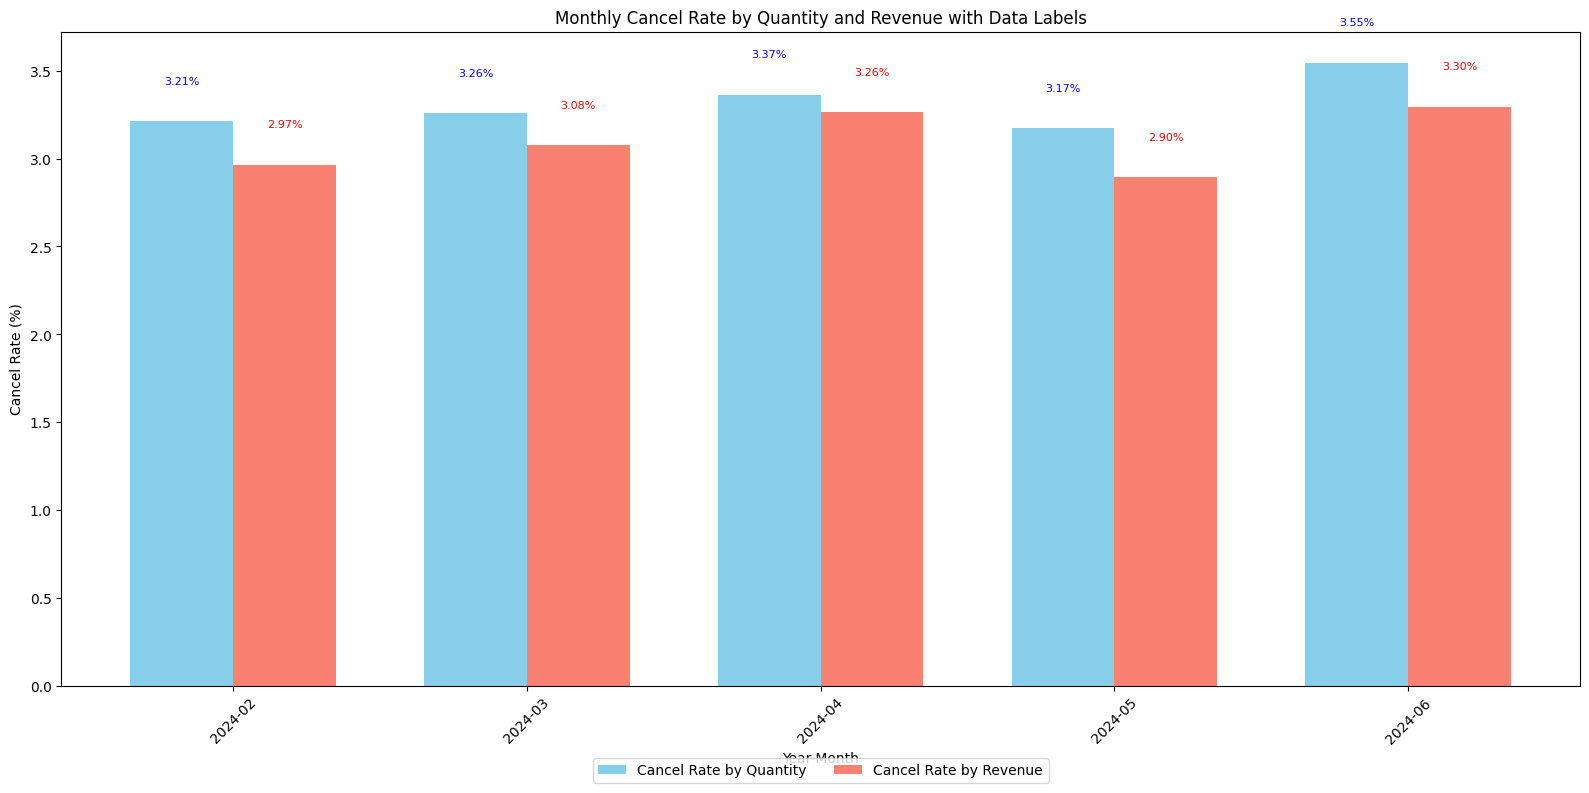

Month with Highest Cancel Rate by Quantity: 2024-06 (3.55%)
Month with Highest Cancel Rate by Revenue: 2024-06 (3.30%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['ORDER_DT', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT']):
    # Convert ORDER_DT to datetime if not already
    orders_with_store['ORDER_DT'] = pd.to_datetime(orders_with_store['ORDER_DT'])

    # Extract year and month for grouping
    orders_with_store['Year_Month'] = orders_with_store['ORDER_DT'].dt.to_period('M')

    # Group by Year_Month to calculate totals
    monthly_data = orders_with_store.groupby('Year_Month', as_index=False).agg({
        'PLCD_QTY': 'sum',
        'PLCD_AMT': 'sum',
        'CNCL_QTY': 'sum',
        'CNCL_AMT': 'sum'
    })

    # Calculate cancel rates
    monthly_data['Cancel_Rate_Qty'] = (monthly_data['CNCL_QTY'] / monthly_data['PLCD_QTY']) * 100
    monthly_data['Cancel_Rate_Revenue'] = (monthly_data['CNCL_AMT'] / monthly_data['PLCD_AMT']) * 100

    # Find the month with the highest cancellation rates
    highest_qty_month = monthly_data.loc[monthly_data['Cancel_Rate_Qty'].idxmax()]
    highest_revenue_month = monthly_data.loc[monthly_data['Cancel_Rate_Revenue'].idxmax()]

    # Bar chart setup
    x = np.arange(len(monthly_data['Year_Month']))  # the label locations
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(16, 8))  # Increased figure size

    # Bars for cancel rate by quantity
    bars_qty = ax.bar(x - bar_width / 2, monthly_data['Cancel_Rate_Qty'], bar_width, label='Cancel Rate by Quantity', color='skyblue')

    # Bars for cancel rate by revenue
    bars_revenue = ax.bar(x + bar_width / 2, monthly_data['Cancel_Rate_Revenue'], bar_width, label='Cancel Rate by Revenue', color='salmon')

    # Add data labels for quantity bars
    for bar in bars_qty:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.2, f'{height:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')

    # Add data labels for revenue bars
    for bar in bars_revenue:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.2, f'{height:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

    # Add labels, title, and legend
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Cancel Rate (%)')
    ax.set_title('Monthly Cancel Rate by Quantity and Revenue with Data Labels')
    ax.set_xticks(x)
    ax.set_xticklabels(monthly_data['Year_Month'].astype(str), rotation=45)
    ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  # Moved legend below the chart

    # Tight layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the months with the highest cancellation rates
    print(f"Month with Highest Cancel Rate by Quantity: {highest_qty_month['Year_Month']} "
          f"({highest_qty_month['Cancel_Rate_Qty']:.2f}%)")
    print(f"Month with Highest Cancel Rate by Revenue: {highest_revenue_month['Year_Month']} "
          f"({highest_revenue_month['Cancel_Rate_Revenue']:.2f}%)")

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT'.")


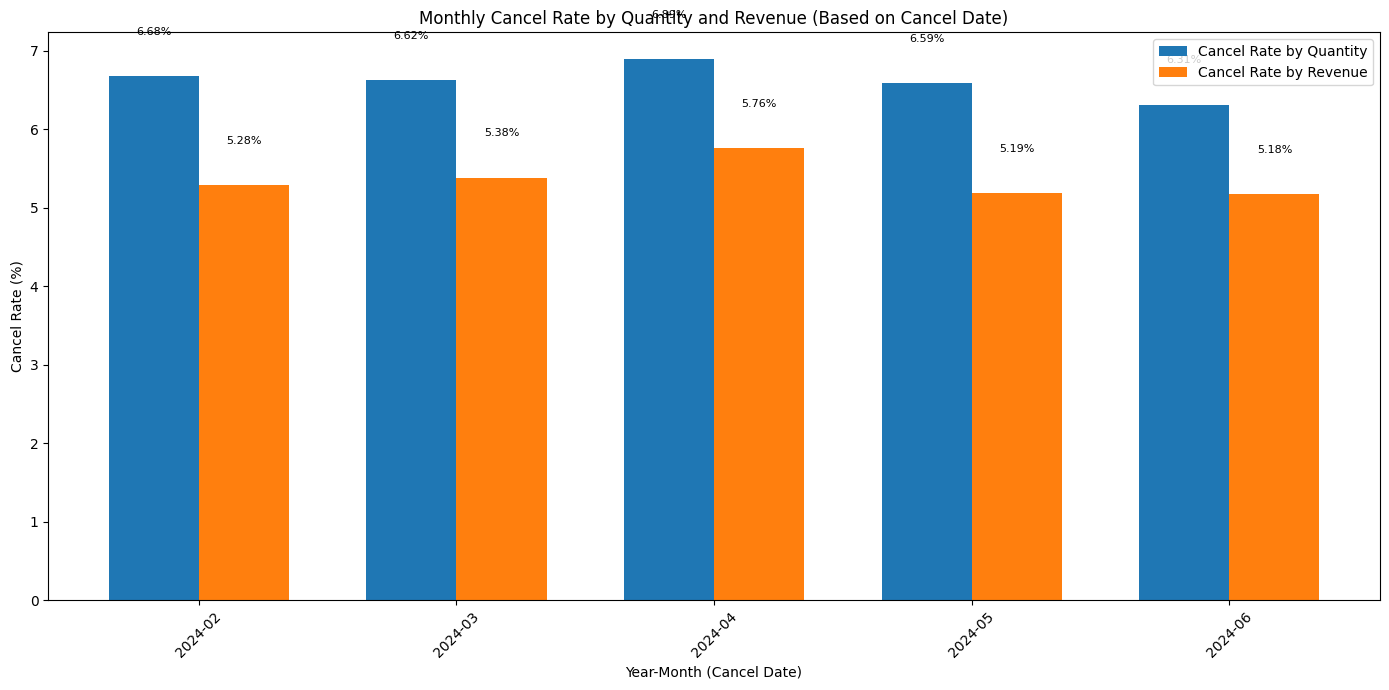

Month with Highest Cancel Rate by Quantity: 2024-04 (6.89%)
Month with Highest Cancel Rate by Revenue: 2024-04 (5.76%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['CANCEL_DT', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT']):
    # Convert CANCEL_DT to datetime if not already
    orders_with_store['CANCEL_DT'] = pd.to_datetime(orders_with_store['CANCEL_DT'])

    # Extract year and month for grouping
    orders_with_store['Cancel_Year_Month'] = orders_with_store['CANCEL_DT'].dt.to_period('M')

    # Group by Cancel_Year_Month to calculate totals
    monthly_cancel_data = orders_with_store.groupby('Cancel_Year_Month', as_index=False).agg({
        'PLCD_QTY': 'sum',
        'PLCD_AMT': 'sum',
        'CNCL_QTY': 'sum',
        'CNCL_AMT': 'sum'
    })

    # Calculate cancel rates
    monthly_cancel_data['Cancel_Rate_Qty'] = (monthly_cancel_data['CNCL_QTY'] / monthly_cancel_data['PLCD_QTY']) * 100
    monthly_cancel_data['Cancel_Rate_Revenue'] = (monthly_cancel_data['CNCL_AMT'] / monthly_cancel_data['PLCD_AMT']) * 100

    # Find the month with the highest cancellation rates
    highest_qty_month = monthly_cancel_data.loc[monthly_cancel_data['Cancel_Rate_Qty'].idxmax()]
    highest_revenue_month = monthly_cancel_data.loc[monthly_cancel_data['Cancel_Rate_Revenue'].idxmax()]

    # Bar chart setup
    x = np.arange(len(monthly_cancel_data['Cancel_Year_Month']))  # the label locations
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))

    # Bars for cancel rate by quantity
    bars_qty = ax.bar(x - bar_width / 2, monthly_cancel_data['Cancel_Rate_Qty'], bar_width, label='Cancel Rate by Quantity')

    # Bars for cancel rate by revenue
    bars_revenue = ax.bar(x + bar_width / 2, monthly_cancel_data['Cancel_Rate_Revenue'], bar_width, label='Cancel Rate by Revenue')

    # Add data labels for quantity bars
    for bar in bars_qty:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add data labels for revenue bars
    for bar in bars_revenue:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels, title, and legend
    ax.set_xlabel('Year-Month (Cancel Date)')
    ax.set_ylabel('Cancel Rate (%)')
    ax.set_title('Monthly Cancel Rate by Quantity and Revenue (Based on Cancel Date)')
    ax.set_xticks(x)
    ax.set_xticklabels(monthly_cancel_data['Cancel_Year_Month'].astype(str), rotation=45)
    ax.legend()

    # Tight layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the months with the highest cancellation rates
    print(f"Month with Highest Cancel Rate by Quantity: {highest_qty_month['Cancel_Year_Month']} "
          f"({highest_qty_month['Cancel_Rate_Qty']:.2f}%)")
    print(f"Month with Highest Cancel Rate by Revenue: {highest_revenue_month['Cancel_Year_Month']} "
          f"({highest_revenue_month['Cancel_Rate_Revenue']:.2f}%)")

else:
    print("The dataframe does not contain the required columns: 'CANCEL_DT', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT'.")


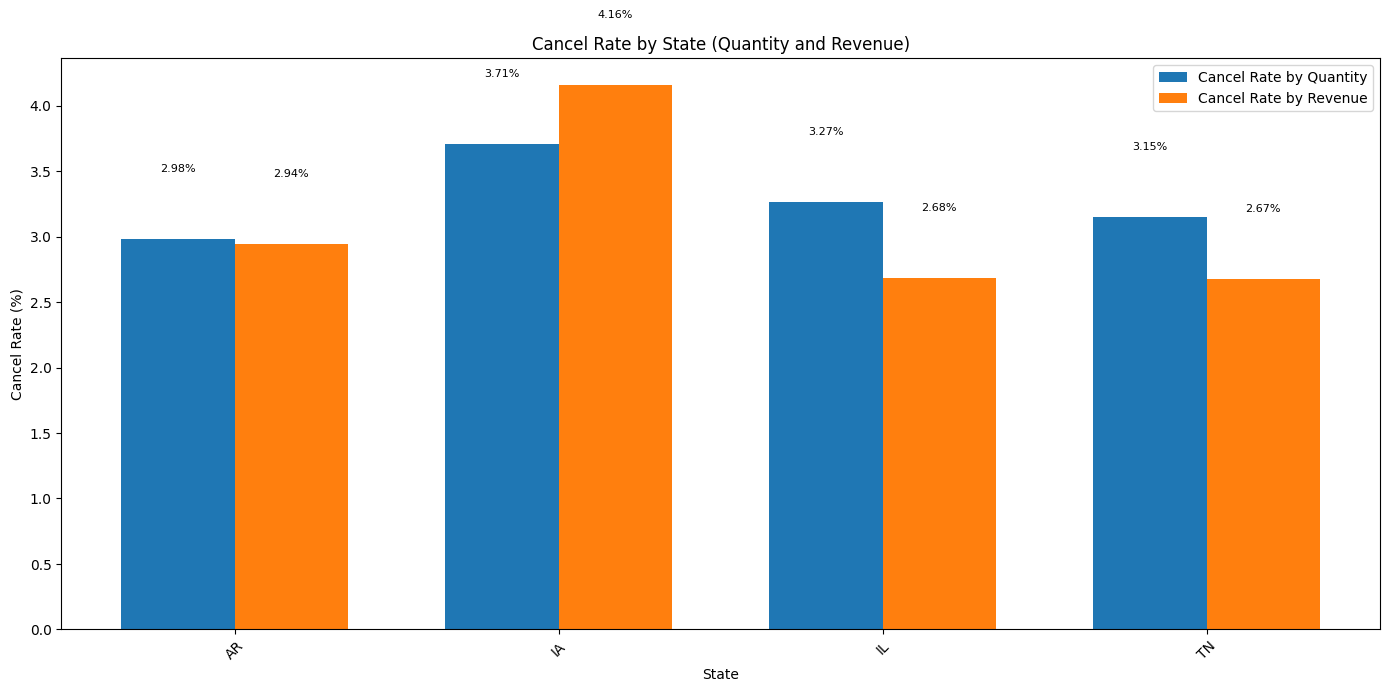

State with Highest Cancel Rate by Quantity: IA (3.71%)
State with Highest Cancel Rate by Revenue: IA (4.16%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['STATE', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT']):
    # Group by STATE to calculate totals
    state_cancel_data = orders_with_store.groupby('STATE', as_index=False).agg({
        'PLCD_QTY': 'sum',
        'PLCD_AMT': 'sum',
        'CNCL_QTY': 'sum',
        'CNCL_AMT': 'sum'
    })

    # Calculate cancel rates
    state_cancel_data['Cancel_Rate_Qty'] = (state_cancel_data['CNCL_QTY'] / state_cancel_data['PLCD_QTY']) * 100
    state_cancel_data['Cancel_Rate_Revenue'] = (state_cancel_data['CNCL_AMT'] / state_cancel_data['PLCD_AMT']) * 100

    # Find the state with the highest cancellation rates
    highest_qty_state = state_cancel_data.loc[state_cancel_data['Cancel_Rate_Qty'].idxmax()]
    highest_revenue_state = state_cancel_data.loc[state_cancel_data['Cancel_Rate_Revenue'].idxmax()]

    # Bar chart setup
    x = np.arange(len(state_cancel_data['STATE']))  # the label locations
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))

    # Bars for cancel rate by quantity
    bars_qty = ax.bar(x - bar_width / 2, state_cancel_data['Cancel_Rate_Qty'], bar_width, label='Cancel Rate by Quantity')

    # Bars for cancel rate by revenue
    bars_revenue = ax.bar(x + bar_width / 2, state_cancel_data['Cancel_Rate_Revenue'], bar_width, label='Cancel Rate by Revenue')

    # Add data labels for quantity bars
    for bar in bars_qty:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add data labels for revenue bars
    for bar in bars_revenue:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels, title, and legend
    ax.set_xlabel('State')
    ax.set_ylabel('Cancel Rate (%)')
    ax.set_title('Cancel Rate by State (Quantity and Revenue)')
    ax.set_xticks(x)
    ax.set_xticklabels(state_cancel_data['STATE'], rotation=45)
    ax.legend()

    # Tight layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the states with the highest cancellation rates
    print(f"State with Highest Cancel Rate by Quantity: {highest_qty_state['STATE']} "
          f"({highest_qty_state['Cancel_Rate_Qty']:.2f}%)")
    print(f"State with Highest Cancel Rate by Revenue: {highest_revenue_state['STATE']} "
          f"({highest_revenue_state['Cancel_Rate_Revenue']:.2f}%)")

else:
    print("The dataframe does not contain the required columns: 'STATE', 'PLCD_QTY', 'PLCD_AMT', 'CNCL_QTY', 'CNCL_AMT'.")


<ipython-input-37-71f456bfbbcc>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({


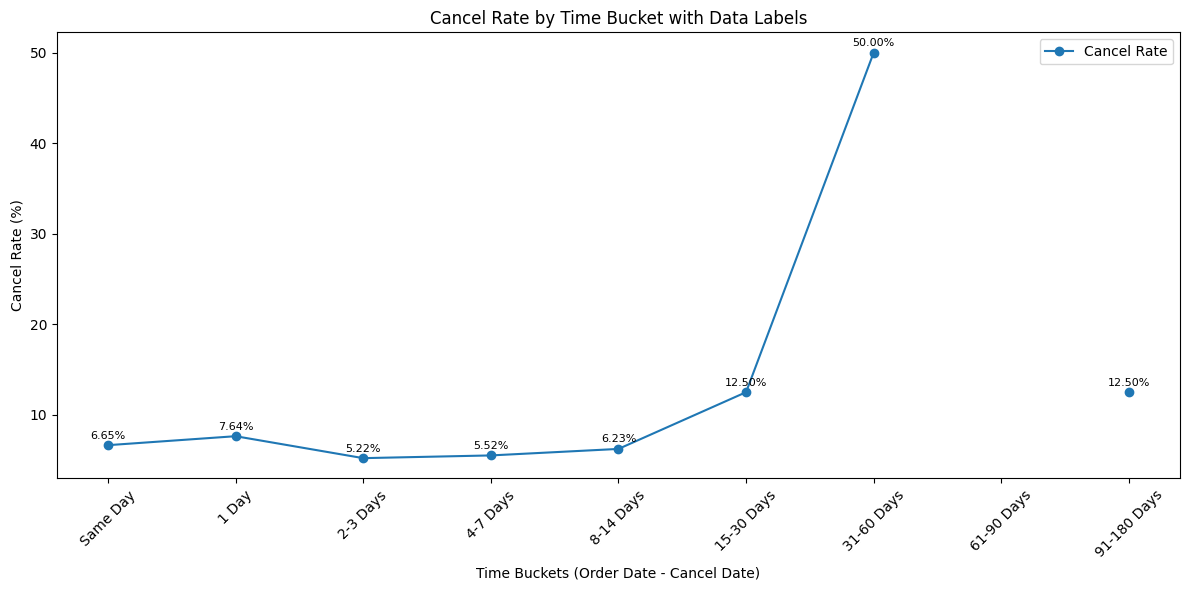

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['ORDER_DT', 'CANCEL_DT', 'PLCD_QTY', 'CNCL_QTY']):
    # Convert ORDER_DT and CANCEL_DT to datetime if not already
    orders_with_store['ORDER_DT'] = pd.to_datetime(orders_with_store['ORDER_DT'])
    orders_with_store['CANCEL_DT'] = pd.to_datetime(orders_with_store['CANCEL_DT'])

    # Calculate the time difference between order date and cancel date in days
    orders_with_store['Time_Bucket'] = (orders_with_store['CANCEL_DT'] - orders_with_store['ORDER_DT']).dt.days

    # Create time buckets (e.g., 0-1 days, 2-3 days, etc.)
    bins = [-1, 0, 1, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
    labels = [
        'Same Day', '1 Day', '2-3 Days', '4-7 Days', '8-14 Days',
        '15-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', 'Over 365 Days'
    ]
    orders_with_store['Time_Bucket_Label'] = pd.cut(orders_with_store['Time_Bucket'], bins=bins, labels=labels)

    # Group by time bucket to calculate totals
    time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({
        'PLCD_QTY': 'sum',
        'CNCL_QTY': 'sum'
    })

    # Calculate cancel rate by time bucket
    time_bucket_data['Cancel_Rate'] = (time_bucket_data['CNCL_QTY'] / time_bucket_data['PLCD_QTY']) * 100

    # Plot the trend of cancel rate by time bucket
    plt.figure(figsize=(12, 6))
    plt.plot(time_bucket_data['Time_Bucket_Label'], time_bucket_data['Cancel_Rate'], marker='o', linestyle='-', label='Cancel Rate')

    # Add data labels
    for i, rate in enumerate(time_bucket_data['Cancel_Rate']):
        plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels, title, and legend
    plt.xlabel('Time Buckets (Order Date - Cancel Date)')
    plt.ylabel('Cancel Rate (%)')
    plt.title('Cancel Rate by Time Bucket with Data Labels')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CANCEL_DT', 'PLCD_QTY', 'CNCL_QTY'.")


<ipython-input-38-e052a05503a4>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({


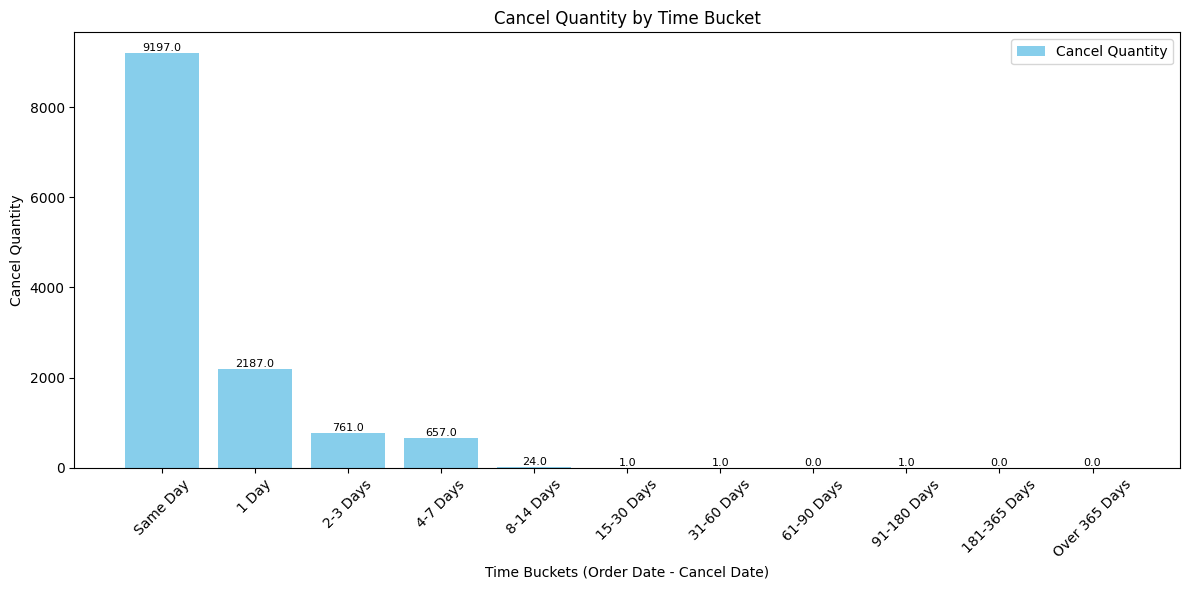

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['ORDER_DT', 'CANCEL_DT', 'CNCL_QTY']):
    # Convert ORDER_DT and CANCEL_DT to datetime if not already
    orders_with_store['ORDER_DT'] = pd.to_datetime(orders_with_store['ORDER_DT'])
    orders_with_store['CANCEL_DT'] = pd.to_datetime(orders_with_store['CANCEL_DT'])

    # Calculate the time difference between order date and cancel date in days
    orders_with_store['Time_Bucket'] = (orders_with_store['CANCEL_DT'] - orders_with_store['ORDER_DT']).dt.days

    # Create time buckets (e.g., 0-1 days, 2-3 days, etc.)
    bins = [-1, 0, 1, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
    labels = [
        'Same Day', '1 Day', '2-3 Days', '4-7 Days', '8-14 Days',
        '15-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', 'Over 365 Days'
    ]
    orders_with_store['Time_Bucket_Label'] = pd.cut(orders_with_store['Time_Bucket'], bins=bins, labels=labels)

    # Group by time bucket to calculate cancel quantities
    time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({
        'CNCL_QTY': 'sum'
    })

    # Plot the trend of cancel quantity by time bucket
    plt.figure(figsize=(12, 6))
    plt.bar(time_bucket_data['Time_Bucket_Label'], time_bucket_data['CNCL_QTY'], color='skyblue', label='Cancel Quantity')

    # Add data labels
    for i, qty in enumerate(time_bucket_data['CNCL_QTY']):
        plt.text(i, qty + 0.5, f'{qty}', ha='center', va='bottom', fontsize=8)

    # Add labels, title, and legend
    plt.xlabel('Time Buckets (Order Date - Cancel Date)')
    plt.ylabel('Cancel Quantity')
    plt.title('Cancel Quantity by Time Bucket')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CANCEL_DT', 'CNCL_QTY'.")
 # Group by time bucket to calculate cancel quantities
    time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({
        'CNCL_QTY': 'sum'
    })

<ipython-input-49-36d9b5413054>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({


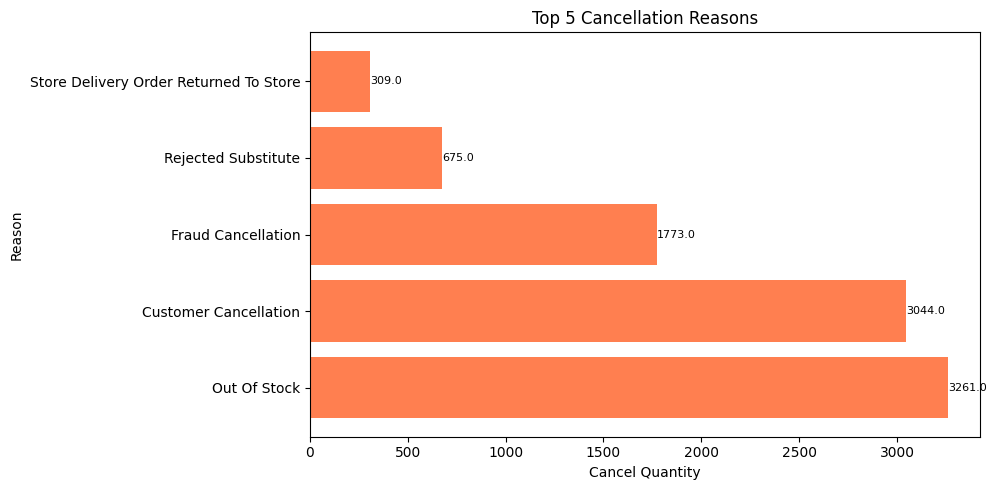

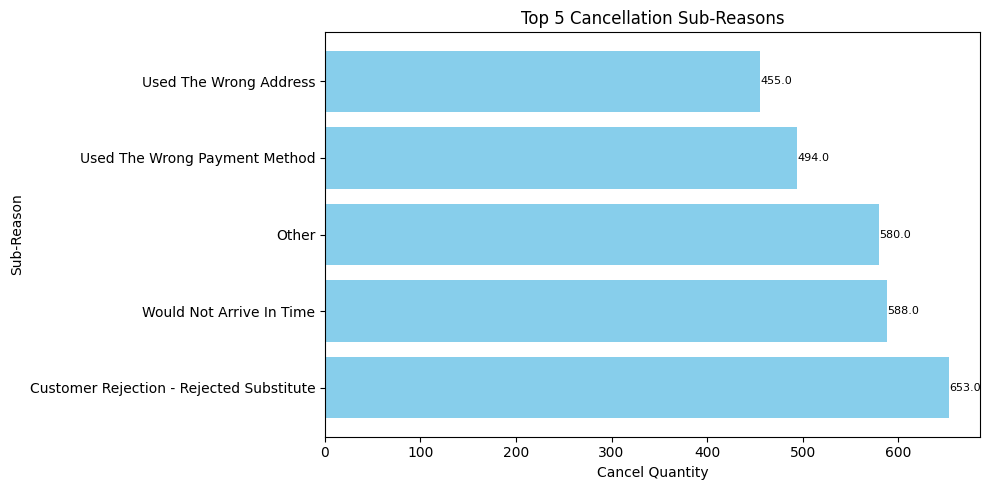

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_store.columns for col in ['ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'CNCL_RSN_DESC', 'CNCL_RSN_SUB_DESC']):
    # Convert ORDER_DT and CANCEL_DT to datetime if not already
    orders_with_store['ORDER_DT'] = pd.to_datetime(orders_with_store['ORDER_DT'])
    orders_with_store['CANCEL_DT'] = pd.to_datetime(orders_with_store['CANCEL_DT'])

    # Calculate the time difference between order date and cancel date in days
    orders_with_store['Time_Bucket'] = (orders_with_store['CANCEL_DT'] - orders_with_store['ORDER_DT']).dt.days

    # Create time buckets (e.g., 0-1 days, 2-3 days, etc.)
    bins = [-1, 0, 1, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
    labels = [
        'Same Day', '1 Day', '2-3 Days', '4-7 Days', '8-14 Days',
        '15-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', 'Over 365 Days'
    ]
    orders_with_store['Time_Bucket_Label'] = pd.cut(orders_with_store['Time_Bucket'], bins=bins, labels=labels)

    # Group by time bucket to calculate cancel quantities
    time_bucket_data = orders_with_store.groupby('Time_Bucket_Label', as_index=False).agg({
        'CNCL_QTY': 'sum'
    })

    # Identify the time bucket with the maximum cancel quantity
    max_time_bucket = time_bucket_data.loc[time_bucket_data['CNCL_QTY'].idxmax(), 'Time_Bucket_Label']

    # Filter data for the time bucket with maximum cancellations
    max_bucket_data = orders_with_store[orders_with_store['Time_Bucket_Label'] == max_time_bucket]

    # Group by cancel reasons and sub-reasons
    reasons_data = max_bucket_data.groupby('CNCL_RSN_DESC', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    sub_reasons_data = max_bucket_data.groupby('CNCL_RSN_SUB_DESC', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    # Plot top 5 cancellation reasons
    plt.figure(figsize=(10, 5))
    plt.barh(reasons_data['CNCL_RSN_DESC'], reasons_data['CNCL_QTY'], color='coral')
    plt.xlabel('Cancel Quantity')
    plt.ylabel('Reason')
    plt.title('Top 5 Cancellation Reasons')
    plt.tight_layout()

    # Add data labels
    for i, qty in enumerate(reasons_data['CNCL_QTY']):
        plt.text(qty + 0.5, i, str(qty), va='center', fontsize=8)

    plt.show()

    # Plot top 5 cancellation sub-reasons
    plt.figure(figsize=(10, 5))
    plt.barh(sub_reasons_data['CNCL_RSN_SUB_DESC'], sub_reasons_data['CNCL_QTY'], color='skyblue')
    plt.xlabel('Cancel Quantity')
    plt.ylabel('Sub-Reason')
    plt.title('Top 5 Cancellation Sub-Reasons')
    plt.tight_layout()

    # Add data labels
    for i, qty in enumerate(sub_reasons_data['CNCL_QTY']):
        plt.text(qty + 0.5, i, str(qty), va='center', fontsize=8)

    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'CNCL_RSN_DESC', 'CNCL_RSN_SUB_DESC'.")


<ipython-input-52-bc41b69ae16d>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_bucket_data = orders_with_product.groupby('Time_Bucket_Label', as_index=False).agg({


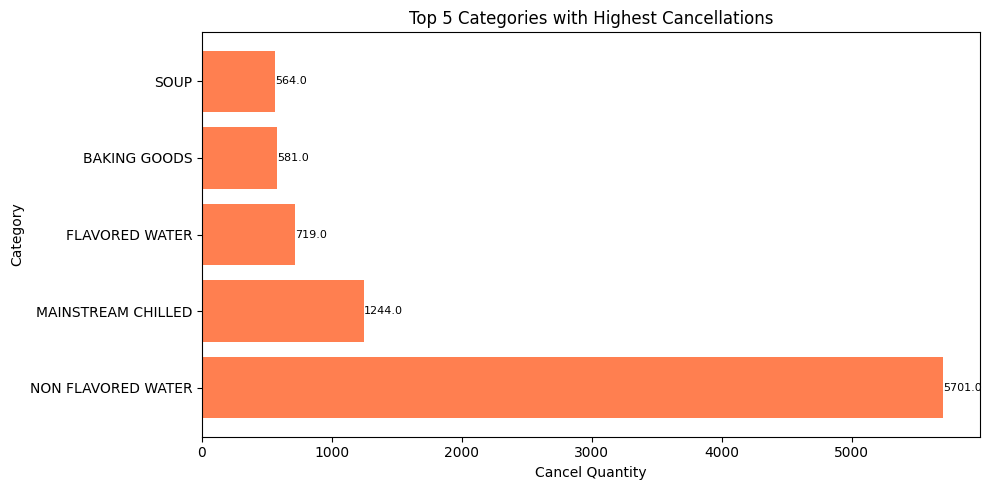

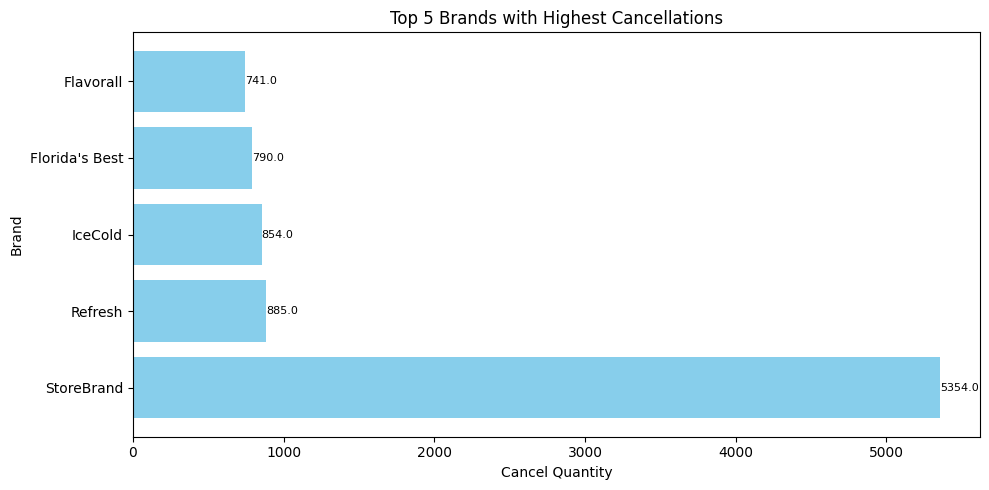

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert ACTIVE_DATE to datetime for consistency
Product['ACTIVE_DATE'] = pd.to_datetime(Product['ACTIVE_DATE'])

# Join product details with orders_with_store on ITEM_ID
orders_with_product = pd.merge(
    orders_with_store,
    Product,
    on='ITEM_ID',
    how='left'  # Left join to keep all orders and enrich with product details
)

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'CATEGORY', 'BRAND']):
    # Convert ORDER_DT and CANCEL_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])
    orders_with_product['CANCEL_DT'] = pd.to_datetime(orders_with_product['CANCEL_DT'])

    # Calculate the time difference between order date and cancel date in days
    orders_with_product['Time_Bucket'] = (orders_with_product['CANCEL_DT'] - orders_with_product['ORDER_DT']).dt.days

    # Create time buckets (e.g., 0-1 days, 2-3 days, etc.)
    bins = [-1, 0, 1, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
    labels = [
        'Same Day', '1 Day', '2-3 Days', '4-7 Days', '8-14 Days',
        '15-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', 'Over 365 Days'
    ]
    orders_with_product['Time_Bucket_Label'] = pd.cut(orders_with_product['Time_Bucket'], bins=bins, labels=labels)

    # Group by time bucket to calculate cancel quantities
    time_bucket_data = orders_with_product.groupby('Time_Bucket_Label', as_index=False).agg({
        'CNCL_QTY': 'sum'
    })

    # Identify the time bucket with the maximum cancel quantity
    max_time_bucket = time_bucket_data.loc[time_bucket_data['CNCL_QTY'].idxmax(), 'Time_Bucket_Label']

    # Filter data for the time bucket with maximum cancellations
    max_bucket_data = orders_with_product[orders_with_product['Time_Bucket_Label'] == max_time_bucket]

    # Group by category and brand to calculate cancel quantities
    category_data = max_bucket_data.groupby('CATEGORY', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    brand_data = max_bucket_data.groupby('BRAND', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    # Plot top 5 categories with highest cancellations
    plt.figure(figsize=(10, 5))
    plt.barh(category_data['CATEGORY'], category_data['CNCL_QTY'], color='coral')
    plt.xlabel('Cancel Quantity')
    plt.ylabel('Category')
    plt.title('Top 5 Categories with Highest Cancellations')
    plt.tight_layout()

    # Add data labels
    for i, qty in enumerate(category_data['CNCL_QTY']):
        plt.text(qty + 0.5, i, str(qty), va='center', fontsize=8)

    plt.show()

    # Plot top 5 brands with highest cancellations
    plt.figure(figsize=(10, 5))
    plt.barh(brand_data['BRAND'], brand_data['CNCL_QTY'], color='skyblue')
    plt.xlabel('Cancel Quantity')
    plt.ylabel('Brand')
    plt.title('Top 5 Brands with Highest Cancellations')
    plt.tight_layout()

    # Add data labels
    for i, qty in enumerate(brand_data['CNCL_QTY']):
        plt.text(qty + 0.5, i, str(qty), va='center', fontsize=8)

    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'CATEGORY', 'BRAND'.")


Top 5 Products with Highest Cancellations on Same Day:
                                          PRODUCT_NAME  CNCL_QTY
90   Purified Drinking Water, 16.9 fl oz Bottles, 4...    2939.0
105  Sparkling Mineral Water Glass Bottles, 12 fl o...     584.0
51   Fruit Punch Real Fruit Juice Drink, 59 fl oz C...     489.0
108                             Spring Water, 1 Gallon     478.0
0     Spring Water, 8-ounce mini plastic bottles (P...     335.0


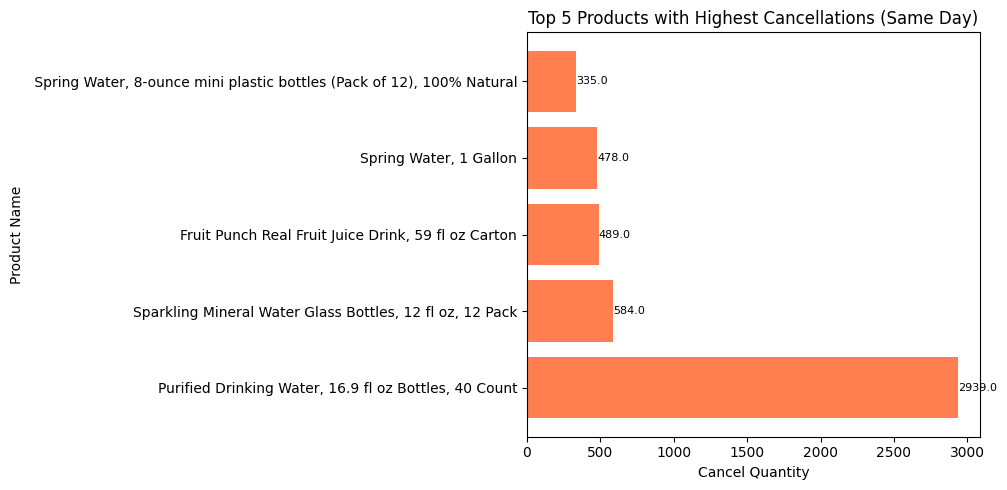

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'PRODUCT_NAME']):
    # Convert ORDER_DT and CANCEL_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])
    orders_with_product['CANCEL_DT'] = pd.to_datetime(orders_with_product['CANCEL_DT'])

    # Calculate the time difference between order date and cancel date in days
    orders_with_product['Time_Bucket'] = (orders_with_product['CANCEL_DT'] - orders_with_product['ORDER_DT']).dt.days

    # Create time buckets (e.g., 0-1 days, 2-3 days, etc.)
    bins = [-1, 0, 1, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
    labels = [
        'Same Day', '1 Day', '2-3 Days', '4-7 Days', '8-14 Days',
        '15-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', 'Over 365 Days'
    ]
    orders_with_product['Time_Bucket_Label'] = pd.cut(orders_with_product['Time_Bucket'], bins=bins, labels=labels)

    # Filter data for the "Same Day" time bucket
    same_day_data = orders_with_product[orders_with_product['Time_Bucket_Label'] == 'Same Day']

    # Group by product to calculate cancel quantities
    top_products = same_day_data.groupby('PRODUCT_NAME', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    # Display the top 5 products
    print("Top 5 Products with Highest Cancellations on Same Day:")
    print(top_products)

    # Plot the top 5 products with the highest cancellations
    plt.figure(figsize=(10, 5))
    plt.barh(top_products['PRODUCT_NAME'], top_products['CNCL_QTY'], color='coral')
    plt.xlabel('Cancel Quantity')
    plt.ylabel('Product Name')
    plt.title('Top 5 Products with Highest Cancellations (Same Day)')
    plt.tight_layout()

    # Add data labels
    for i, qty in enumerate(top_products['CNCL_QTY']):
        plt.text(qty + 0.5, i, str(qty), va='center', fontsize=8)

    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CANCEL_DT', 'CNCL_QTY', 'PRODUCT_NAME'.")


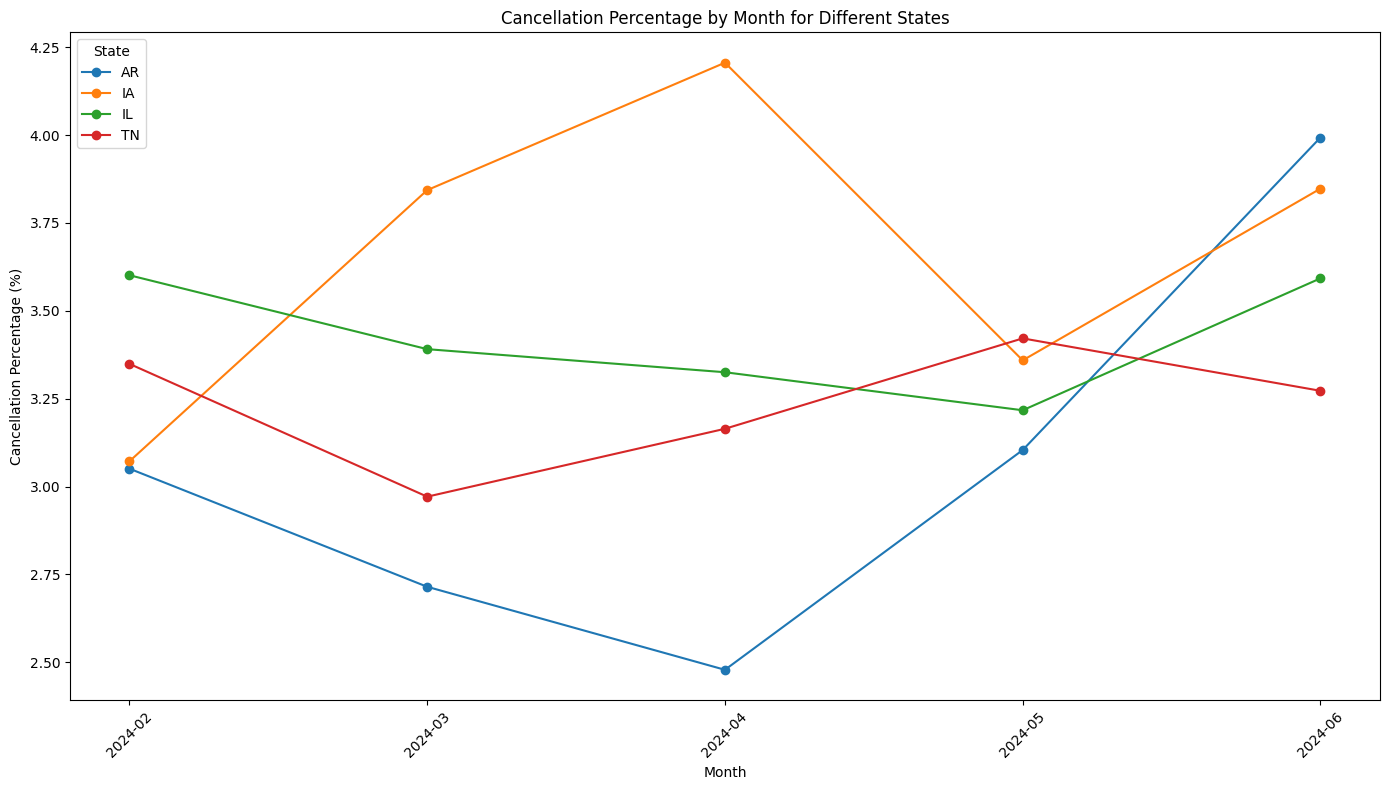

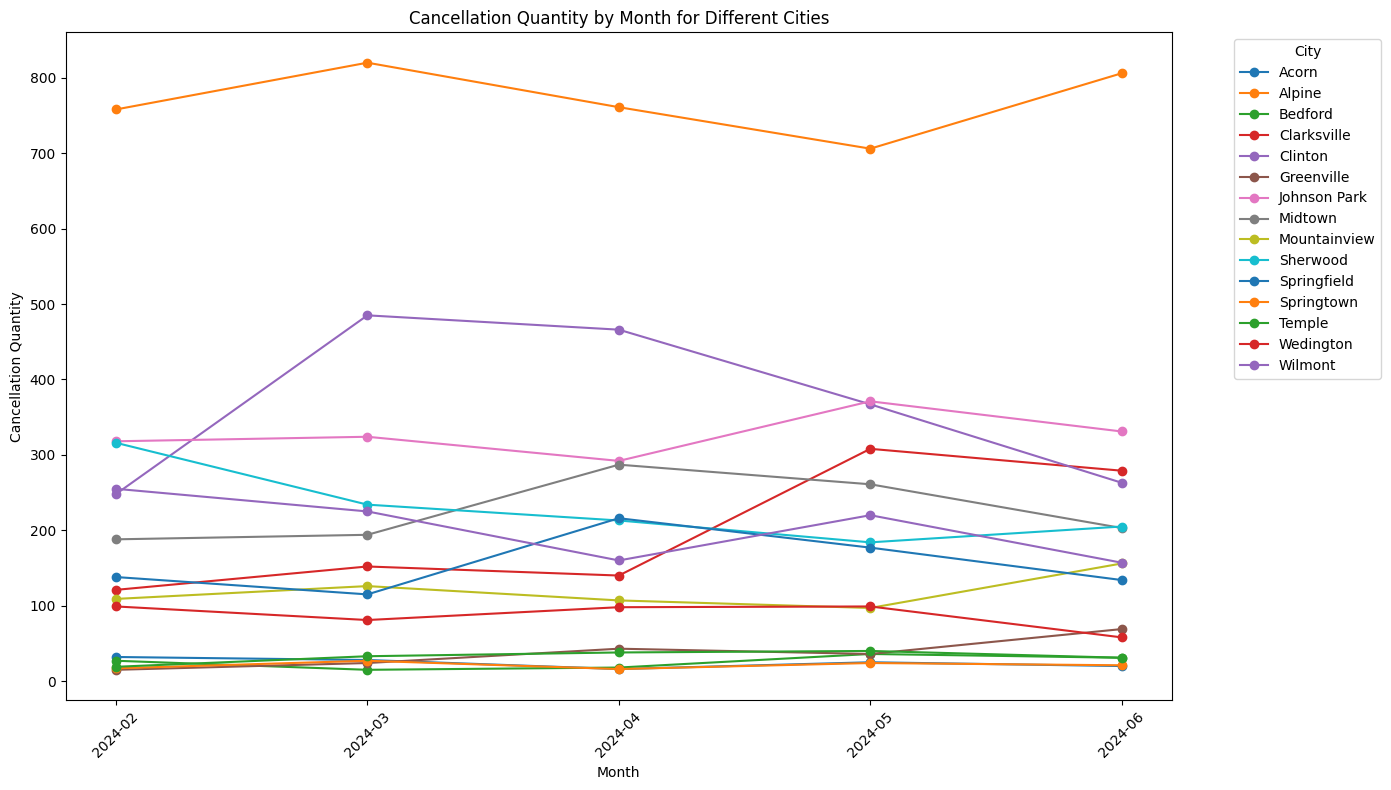

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and year for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by State and Month to calculate cancel quantity and placed quantity
    state_month_data = orders_with_product.groupby(['STATE', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    state_month_data['Cancel_Percentage'] = (state_month_data['CNCL_QTY'] / state_month_data['PLCD_QTY']) * 100

    # Group by City and Month to calculate cancel quantity and placed quantity
    city_month_data = orders_with_product.groupby(['CITY', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    city_month_data['Cancel_Percentage'] = (city_month_data['CNCL_QTY'] / city_month_data['PLCD_QTY']) * 100

    # Plot cancellation percentage by month for different states
    plt.figure(figsize=(14, 8))
    for state in state_month_data['STATE'].unique():
        state_data = state_month_data[state_month_data['STATE'] == state]
        plt.plot(state_data['YearMonth'], state_data['Cancel_Percentage'], label=state, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Cancellation Percentage (%)')
    plt.title('Cancellation Percentage by Month for Different States')
    plt.xticks(rotation=45)
    plt.legend(title='State')
    plt.tight_layout()
    plt.show()

    # Plot cancellation quantity by month for different cities
    plt.figure(figsize=(14, 8))
    for city in city_month_data['CITY'].unique():
        city_data = city_month_data[city_month_data['CITY'] == city]
        plt.plot(city_data['YearMonth'], city_data['CNCL_QTY'], label=city, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Cancellation Quantity')
    plt.title('Cancellation Quantity by Month for Different Cities')
    plt.xticks(rotation=45)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY'.")


<Figure size 1600x1000 with 0 Axes>

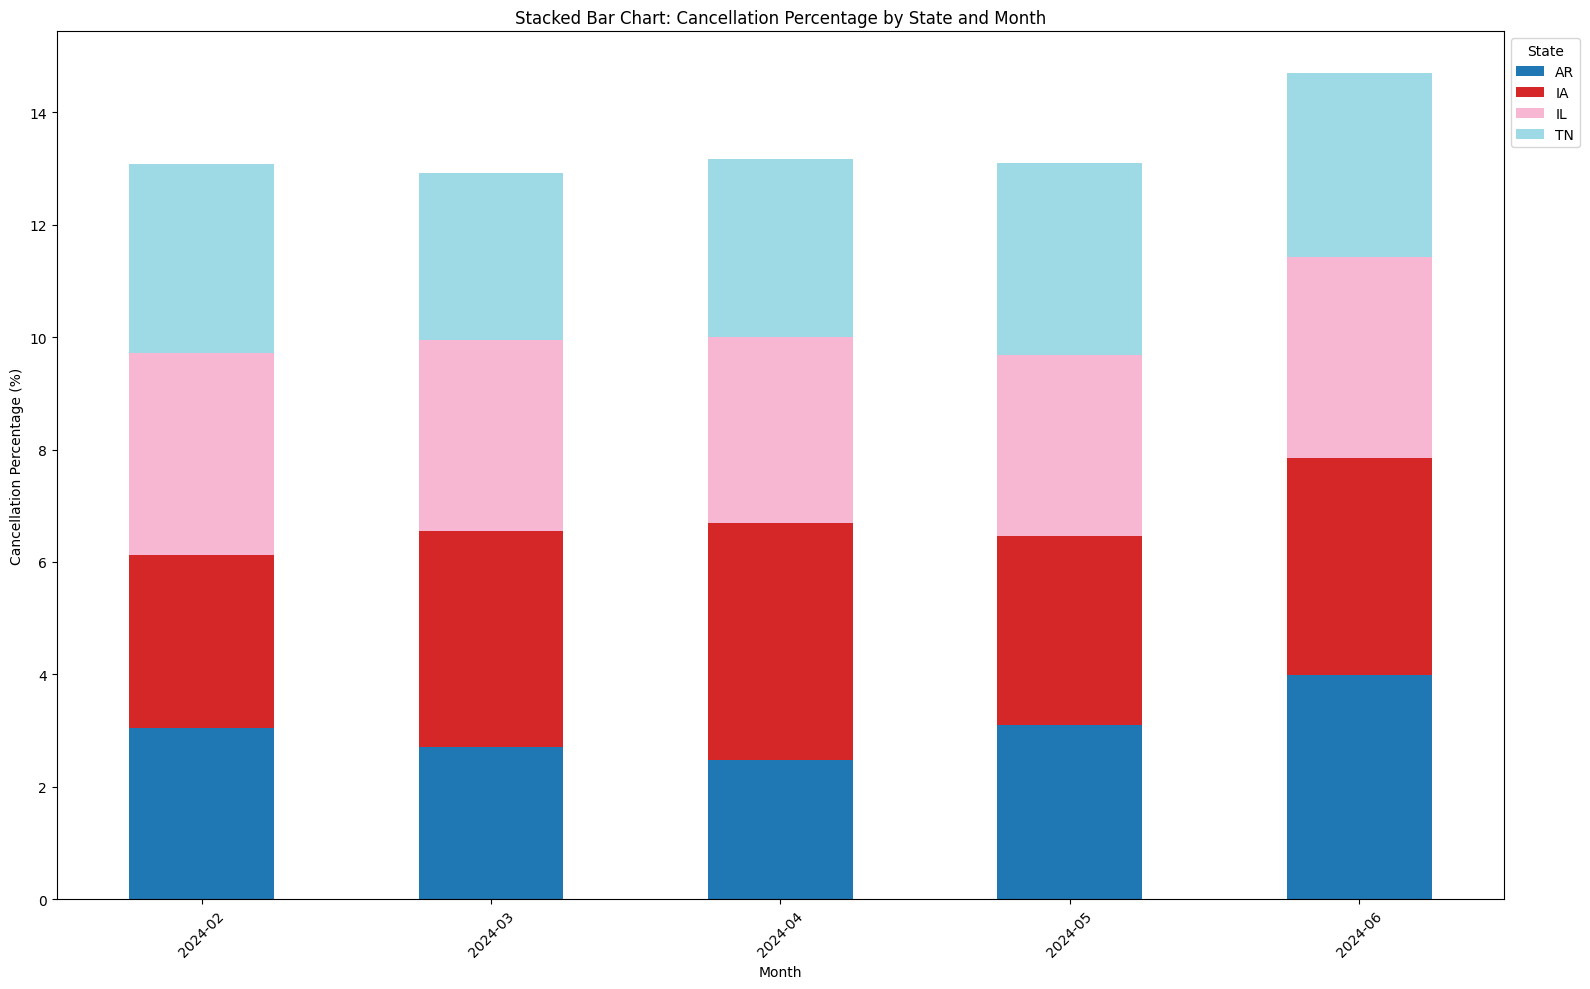

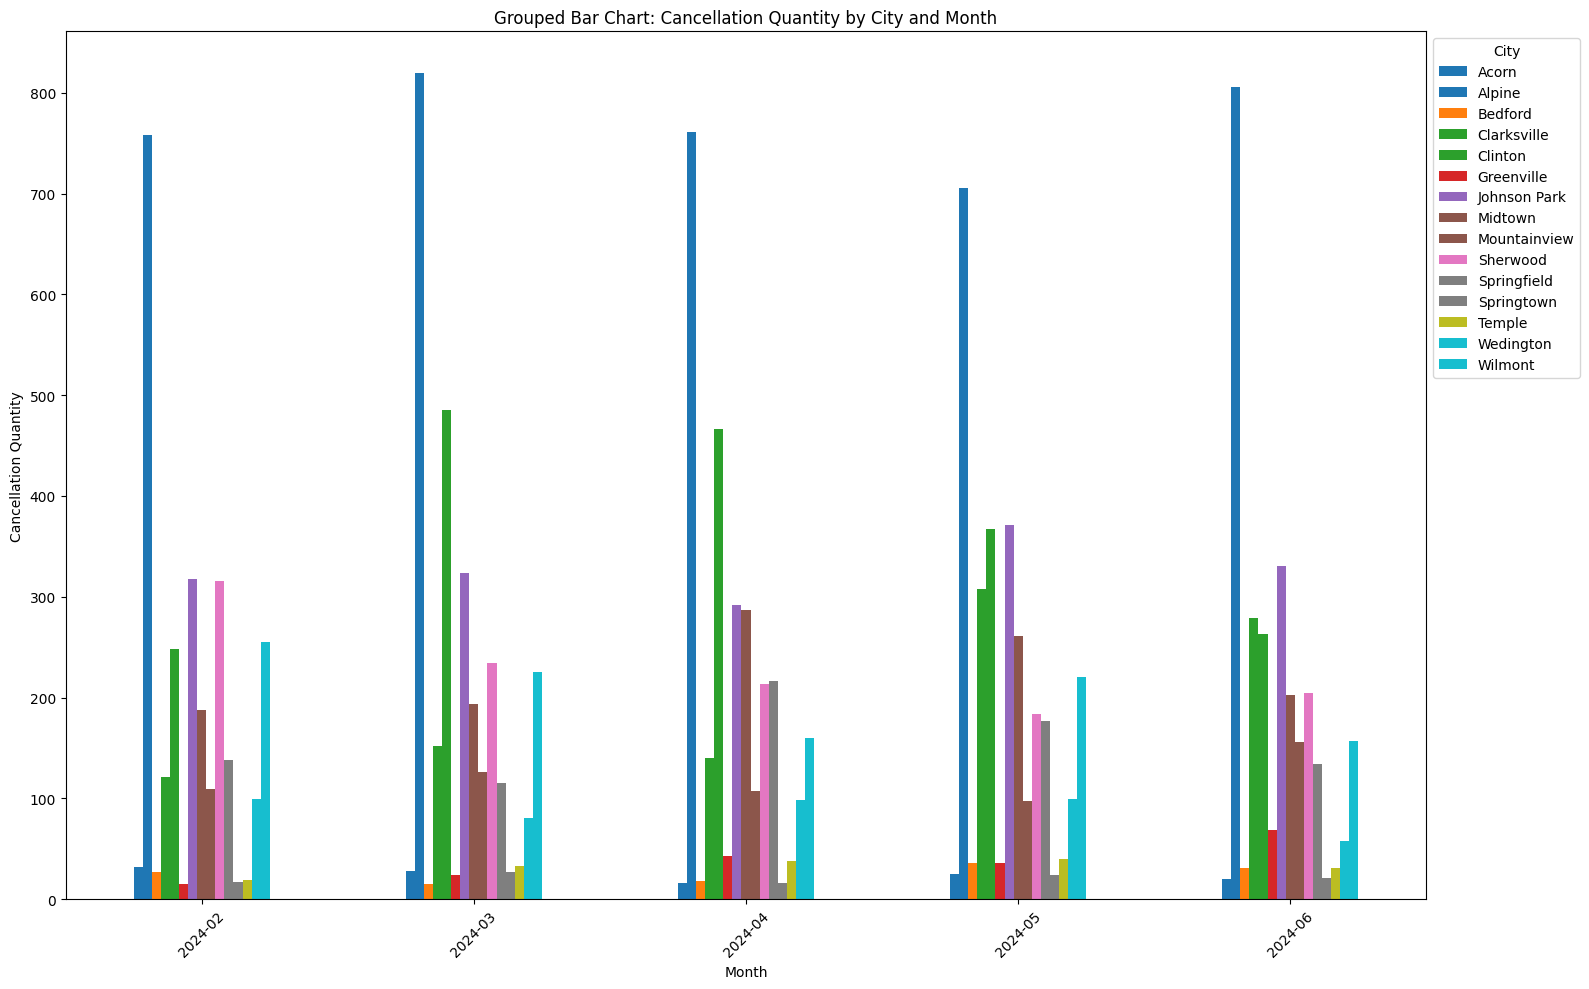

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and year for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by State and Month to calculate cancel quantity, placed quantity, and number of orders
    state_month_data = orders_with_product.groupby(['STATE', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'  # Assuming STORE_NUM represents unique orders
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    state_month_data['Cancel_Percentage'] = (state_month_data['CNCL_QTY'] / state_month_data['PLCD_QTY']) * 100

    # Group by City and Month to calculate cancel quantity, placed quantity, and number of orders
    city_month_data = orders_with_product.groupby(['CITY', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    city_month_data['Cancel_Percentage'] = (city_month_data['CNCL_QTY'] / city_month_data['PLCD_QTY']) * 100

    # Create a pivot table for states to use in stacked bar chart
    pivot_state = state_month_data.pivot(index='YearMonth', columns='STATE', values='Cancel_Percentage').fillna(0)

    # Plot Stacked Bar Chart for State Cancellation Percentage
    plt.figure(figsize=(16, 10))
    pivot_state.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))
    plt.xlabel('Month')
    plt.ylabel('Cancellation Percentage (%)')
    plt.title('Stacked Bar Chart: Cancellation Percentage by State and Month')
    plt.xticks(rotation=45)
    plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    # Create a pivot table for cities to use in grouped bar chart
    pivot_city = city_month_data.pivot(index='YearMonth', columns='CITY', values='CNCL_QTY').fillna(0)

    # Plot Grouped Bar Chart for City Cancellation Quantity
    ax = pivot_city.plot(kind='bar', colormap='tab10', figsize=(16, 10))
    plt.xlabel('Month')
    plt.ylabel('Cancellation Quantity')
    plt.title('Grouped Bar Chart: Cancellation Quantity by City and Month')
    plt.xticks(rotation=45)
    plt.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY'.")


<Figure size 1600x1000 with 0 Axes>

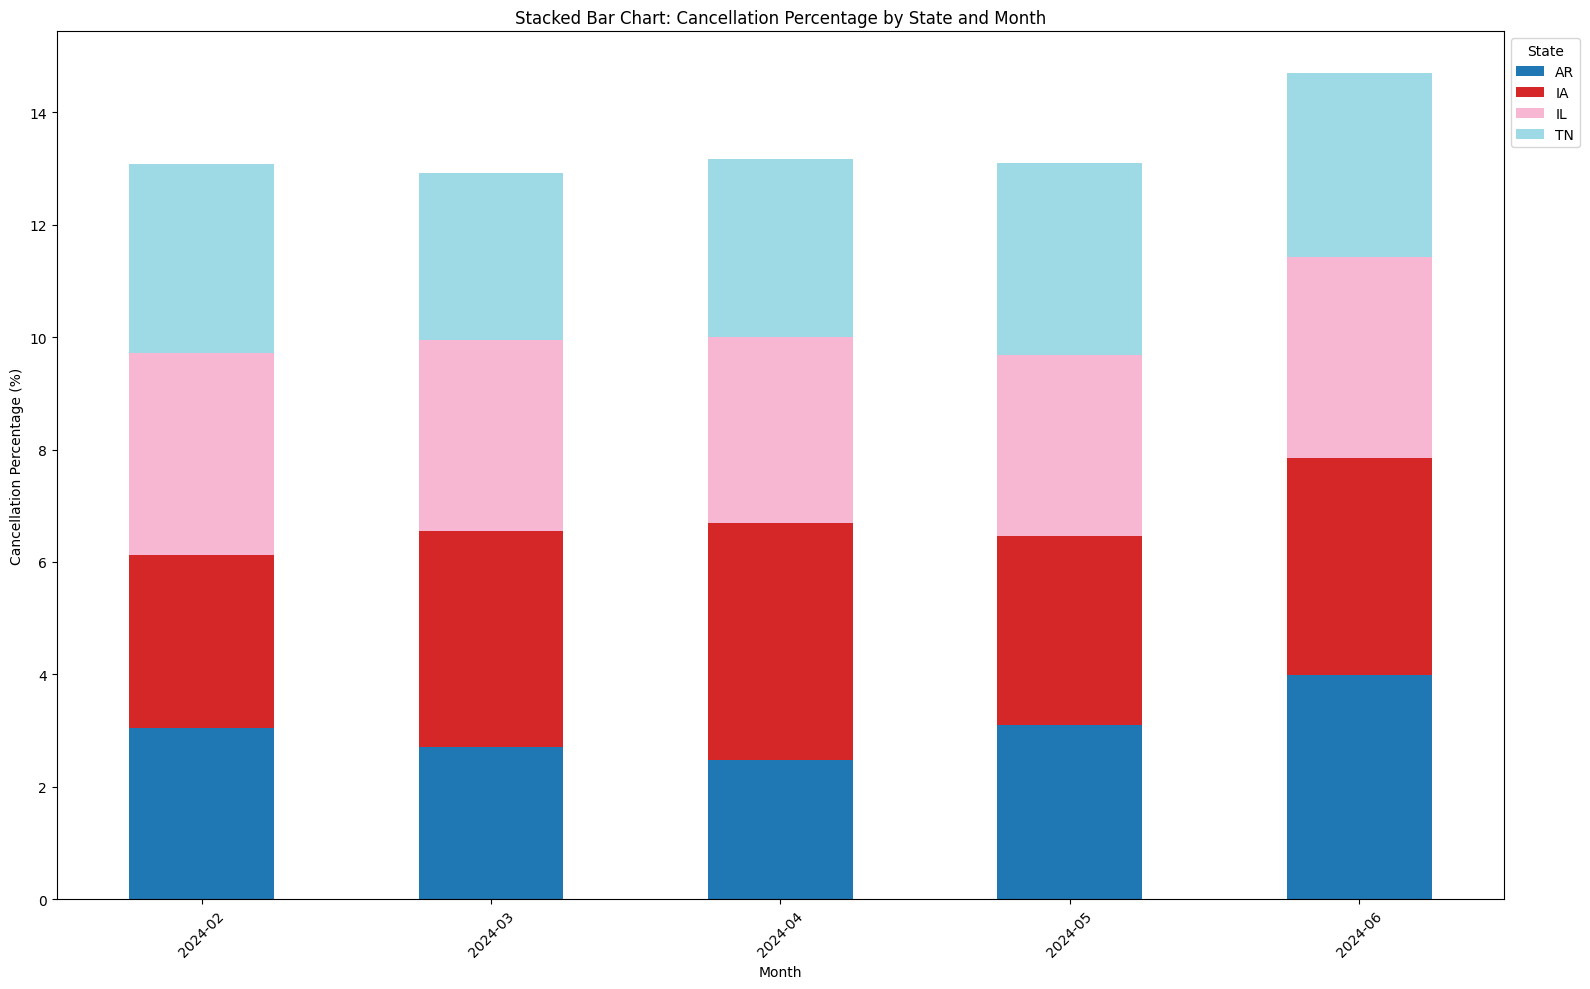

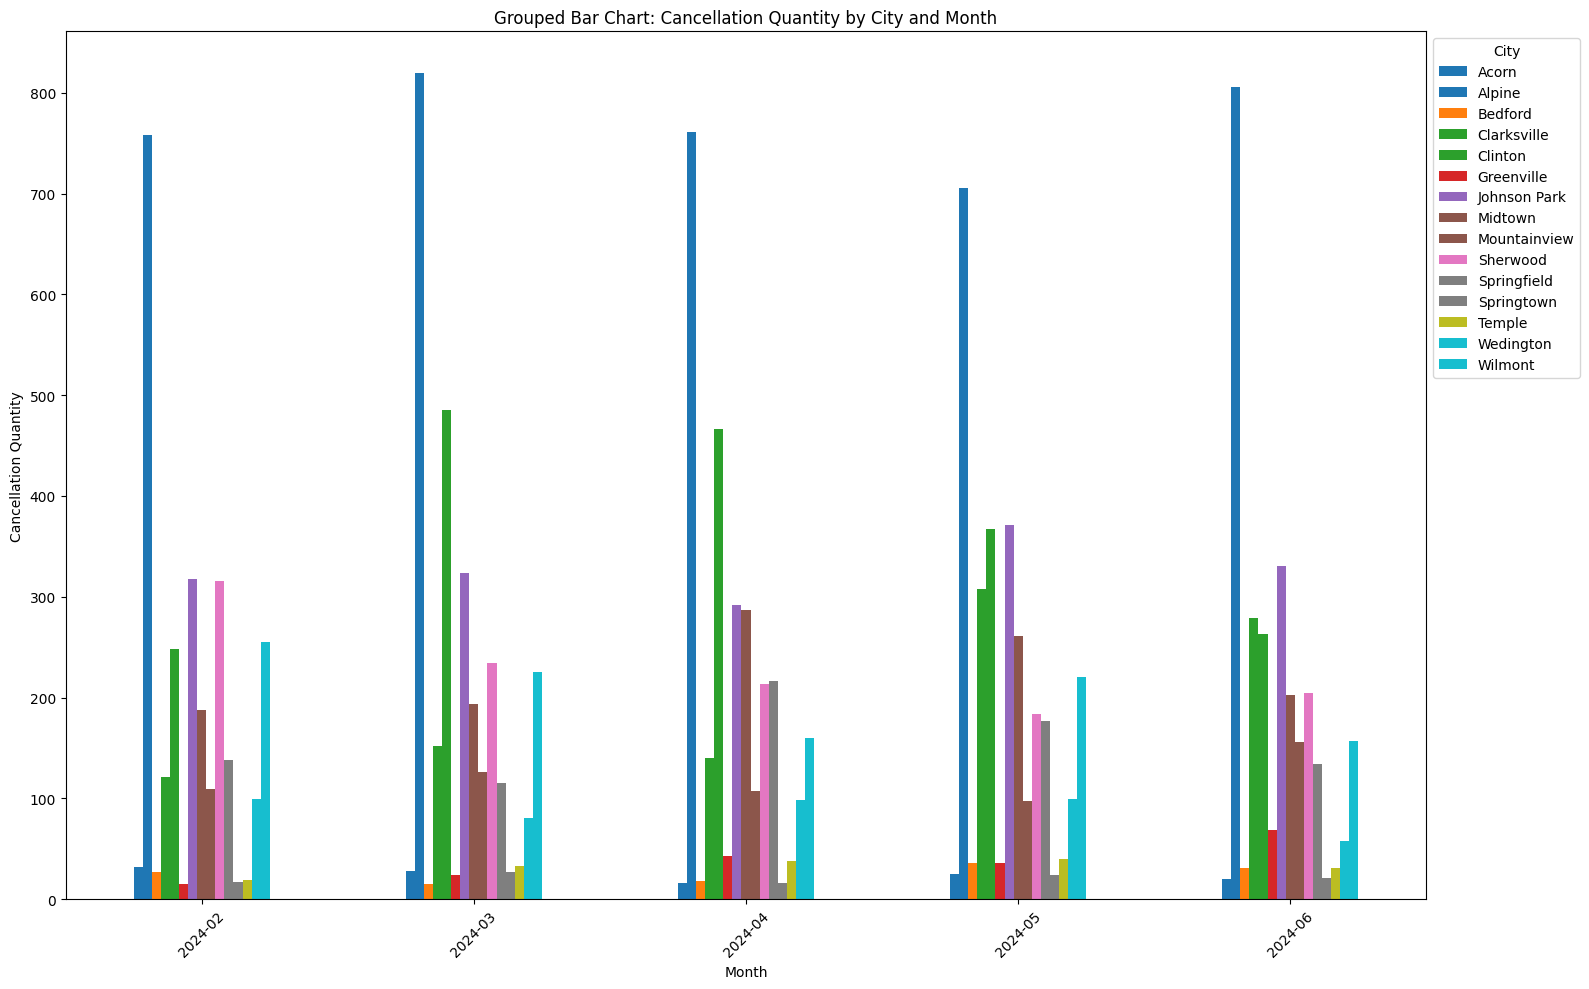

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and year for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by State and Month to calculate cancel quantity, placed quantity, and number of orders
    state_month_data = orders_with_product.groupby(['STATE', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'  # Assuming STORE_NUM represents unique orders
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    state_month_data['Cancel_Percentage'] = (state_month_data['CNCL_QTY'] / state_month_data['PLCD_QTY']) * 100

    # Group by City and Month to calculate cancel quantity, placed quantity, and number of orders
    city_month_data = orders_with_product.groupby(['CITY', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    city_month_data['Cancel_Percentage'] = (city_month_data['CNCL_QTY'] / city_month_data['PLCD_QTY']) * 100

    # Create a pivot table for states to use in stacked bar chart
    pivot_state = state_month_data.pivot(index='YearMonth', columns='STATE', values='Cancel_Percentage').fillna(0)

    # Plot Stacked Bar Chart for State Cancellation Percentage
    plt.figure(figsize=(16, 10))
    pivot_state.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))
    plt.xlabel('Month')
    plt.ylabel('Cancellation Percentage (%)')
    plt.title('Stacked Bar Chart: Cancellation Percentage by State and Month')
    plt.xticks(rotation=45)
    plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    # Create a pivot table for cities to use in grouped bar chart
    pivot_city = city_month_data.pivot(index='YearMonth', columns='CITY', values='CNCL_QTY').fillna(0)

    # Plot Grouped Bar Chart for City Cancellation Quantity
    ax = pivot_city.plot(kind='bar', colormap='tab10', figsize=(16, 10))
    plt.xlabel('Month')
    plt.ylabel('Cancellation Quantity')
    plt.title('Grouped Bar Chart: Cancellation Quantity by City and Month')
    plt.xticks(rotation=45)
    plt.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY'.")


Top States by Cancellation Quantity:
  STATE  CNCL_QTY
2    IL    5584.0
1    IA    3929.0
0    AR    2418.0
3    TN    2198.0

Top Cities by Cancellation Quantity:
            CITY  CNCL_QTY
1         Alpine    3851.0
4        Clinton    1829.0
6   Johnson Park    1636.0
9       Sherwood    1152.0
7        Midtown    1133.0
14       Wilmont    1017.0
3    Clarksville    1000.0
10   Springfield     780.0
8   Mountainview     595.0
13     Wedington     435.0


<Figure size 1600x1000 with 0 Axes>

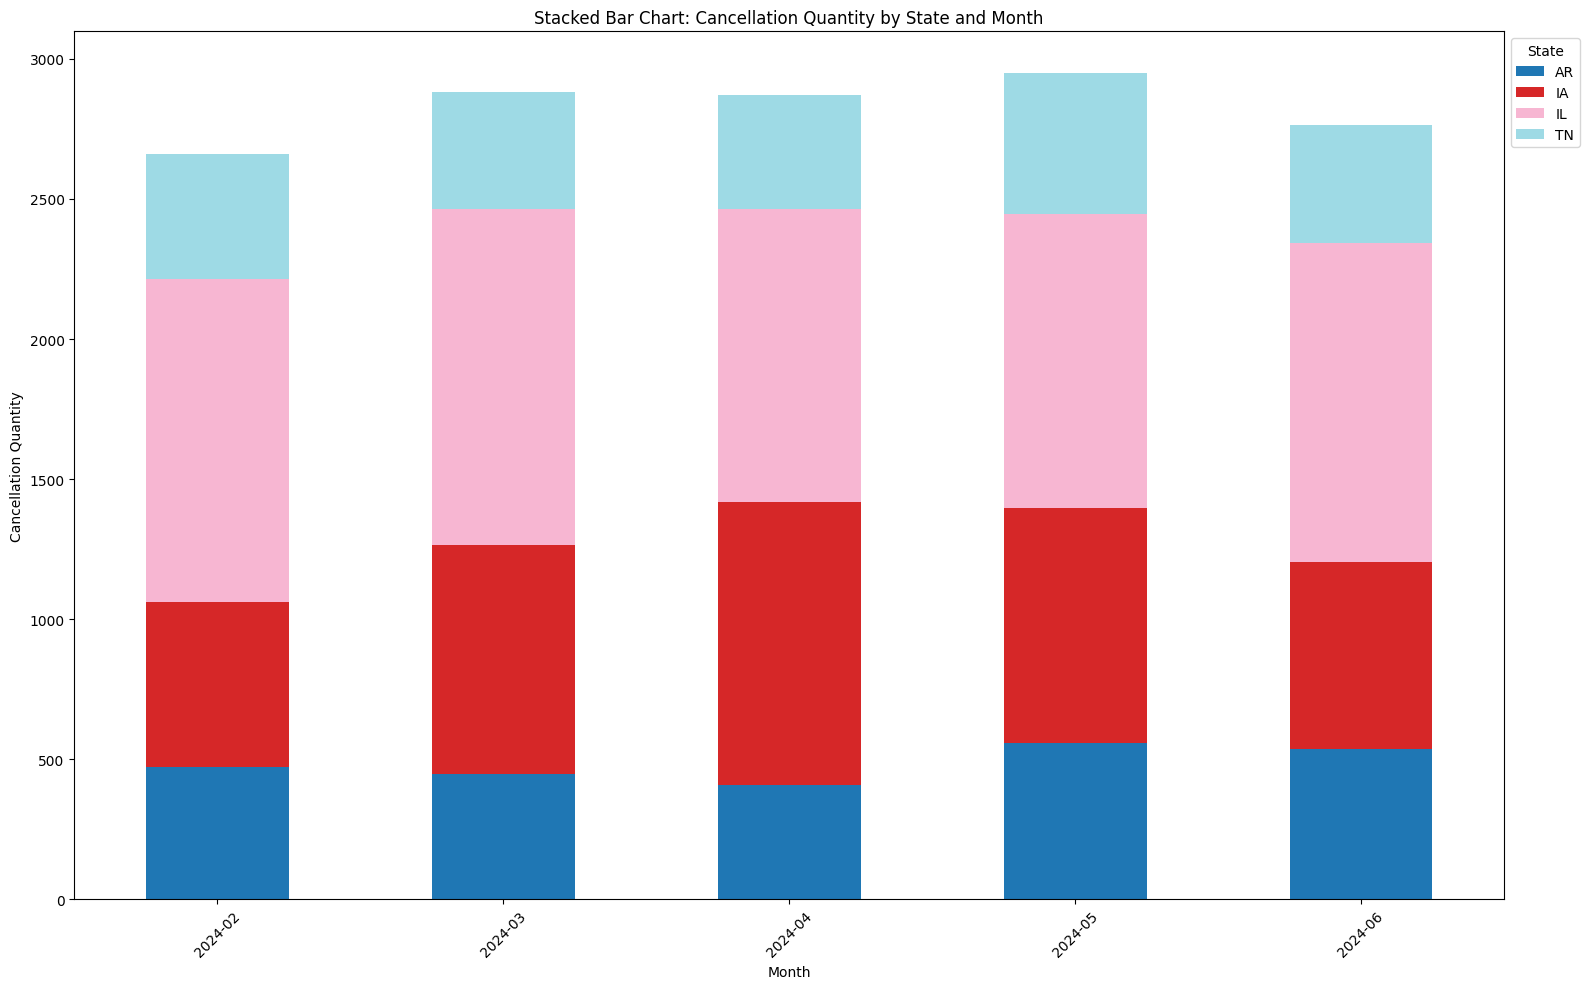

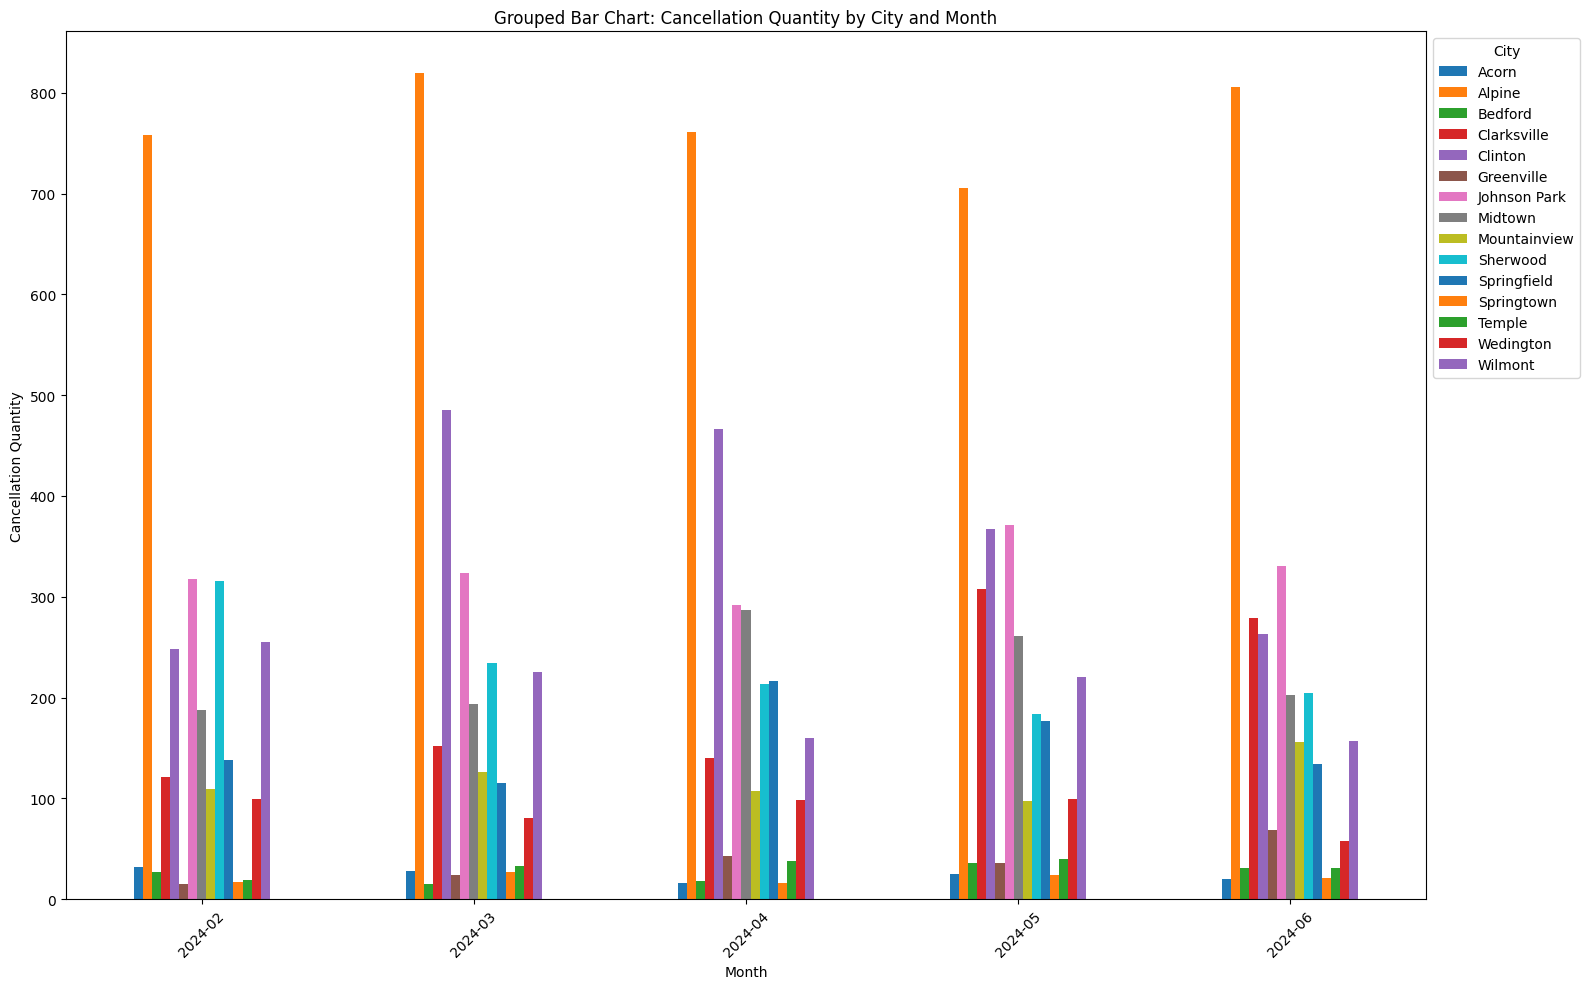

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'STATE', 'CITY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and year for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by State and Month to calculate cancel quantity, placed quantity, and number of orders
    state_month_data = orders_with_product.groupby(['STATE', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'  # Assuming STORE_NUM represents unique orders
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    state_month_data['Cancel_Percentage'] = (state_month_data['CNCL_QTY'] / state_month_data['PLCD_QTY']) * 100

    # Group by City and Month to calculate cancel quantity, placed quantity, and number of orders
    city_month_data = orders_with_product.groupby(['CITY', 'YearMonth'], as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum',
        'STORE_NUM': 'count'
    }).rename(columns={'STORE_NUM': 'Order_Count'})

    # Calculate cancellation percentage
    city_month_data['Cancel_Percentage'] = (city_month_data['CNCL_QTY'] / city_month_data['PLCD_QTY']) * 100

    # Summarize total cancellations by State and City
    state_summary = state_month_data.groupby('STATE', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False)

    city_summary = city_month_data.groupby('CITY', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False)

    # Display the tables
    print("Top States by Cancellation Quantity:")
    print(state_summary.head(10))

    print("\nTop Cities by Cancellation Quantity:")
    print(city_summary.head(10))

    # Create a pivot table for states to use in stacked bar chart
    pivot_state = state_month_data.pivot(index='YearMonth', columns='STATE', values='CNCL_QTY').fillna(0)

    # Plot Stacked Bar Chart for State Cancellation Quantity
    plt.figure(figsize=(16, 10))
    pivot_state.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))
    plt.xlabel('Month')
    plt.ylabel('Cancellation Quantity')
    plt.title('Stacked Bar Chart: Cancellation Quantity by State and Month')
    plt.xticks(rotation=45)
    plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    # Create a pivot table for cities to use in grouped bar chart
    pivot_city = city_month_data.pivot(index='YearMonth', columns='CITY', values='CNCL_QTY').fillna(0)

# Define a custom color palette with distinct colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Ensure the number of colors matches the number of cities
custom_colors = custom_colors[:len(pivot_city.columns)]

# Plot Grouped Bar Chart for City Cancellation Quantity
ax = pivot_city.plot(kind='bar', color=custom_colors, figsize=(16, 10))
plt.xlabel('Month')
plt.ylabel('Cancellation Quantity')
plt.title('Grouped Bar Chart: Cancellation Quantity by City and Month')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and year for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by Month to calculate total cancel quantity and placed quantity
    month_data = orders_with_product.groupby('YearMonth', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    month_data['Cancel_Percentage'] = (month_data['CNCL_QTY'] / month_data['PLCD_QTY']) * 100

    # Find the month with the highest cancellation quantity
    max_cancel_qty_month = month_data.loc[month_data['CNCL_QTY'].idxmax()]

    # Find the month with the highest cancellation percentage
    max_cancel_percentage_month = month_data.loc[month_data['Cancel_Percentage'].idxmax()]

    # Display the results
    print("Month with Highest Cancellation Quantity:")
    print(max_cancel_qty_month)

    print("\nMonth with Highest Cancellation Percentage:")
    print(max_cancel_percentage_month)

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY'.")


Month with Highest Cancellation Quantity:
YearMonth             2024-05
CNCL_QTY               2951.0
PLCD_QTY                90311
Cancel_Percentage    3.267598
Name: 3, dtype: object

Month with Highest Cancellation Percentage:
YearMonth             2024-06
CNCL_QTY               2764.0
PLCD_QTY                75349
Cancel_Percentage    3.668264
Name: 4, dtype: object


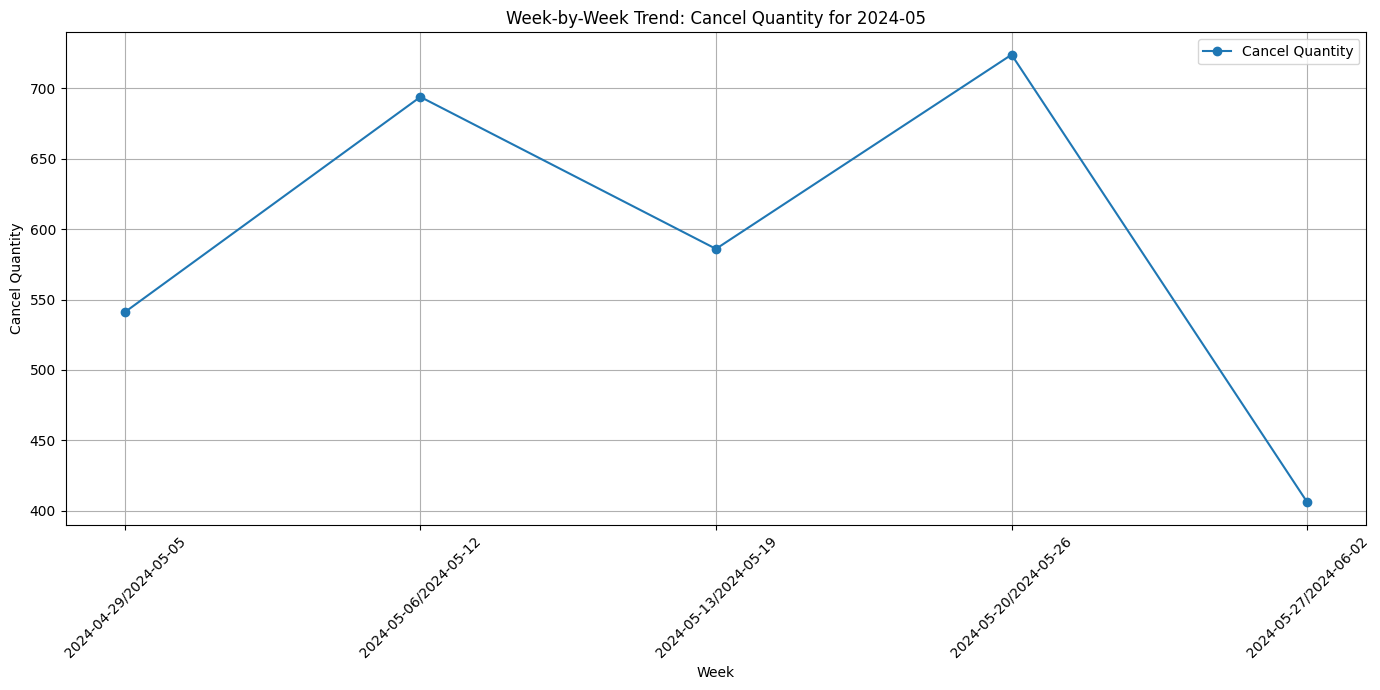

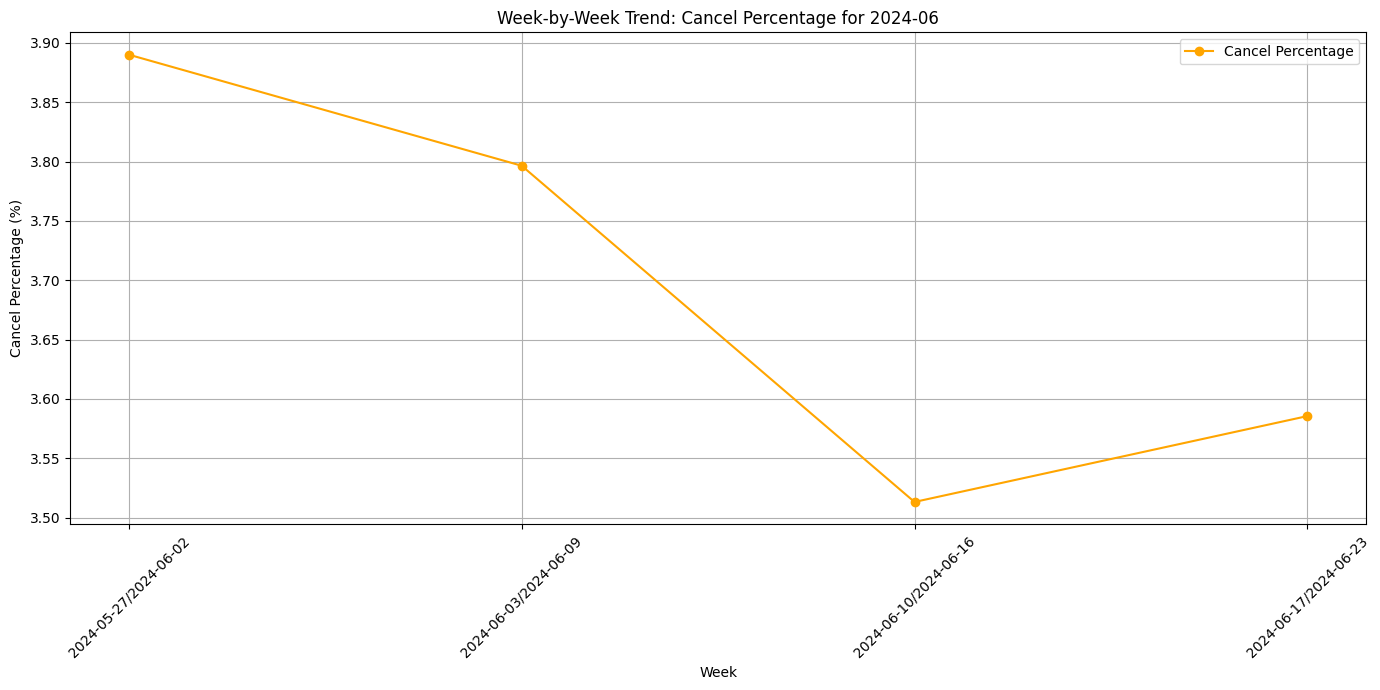

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract month and week for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)
    orders_with_product['YearWeek'] = orders_with_product['ORDER_DT'].dt.to_period('W').astype(str)

    # Group by Month to calculate total cancel quantity and placed quantity
    month_data = orders_with_product.groupby('YearMonth', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    month_data['Cancel_Percentage'] = (month_data['CNCL_QTY'] / month_data['PLCD_QTY']) * 100

    # Find the month with the highest cancellation quantity
    max_cancel_qty_month = month_data.loc[month_data['CNCL_QTY'].idxmax()]['YearMonth']

    # Find the month with the highest cancellation percentage
    max_cancel_percentage_month = month_data.loc[month_data['Cancel_Percentage'].idxmax()]['YearMonth']

    # Filter data for the weeks within the month with the highest cancellation quantity
    qty_month_data = orders_with_product[orders_with_product['YearMonth'] == max_cancel_qty_month]
    qty_week_data = qty_month_data.groupby('YearWeek', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })
    qty_week_data['Cancel_Percentage'] = (qty_week_data['CNCL_QTY'] / qty_week_data['PLCD_QTY']) * 100

    # Filter data for the weeks within the month with the highest cancellation percentage
    perc_month_data = orders_with_product[orders_with_product['YearMonth'] == max_cancel_percentage_month]
    perc_week_data = perc_month_data.groupby('YearWeek', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })
    perc_week_data['Cancel_Percentage'] = (perc_week_data['CNCL_QTY'] / perc_week_data['PLCD_QTY']) * 100

    # Plot week-by-week trend for highest cancellation quantity month
    plt.figure(figsize=(14, 7))
    plt.plot(qty_week_data['YearWeek'], qty_week_data['CNCL_QTY'], marker='o', label='Cancel Quantity')
    plt.title(f'Week-by-Week Trend: Cancel Quantity for {max_cancel_qty_month}')
    plt.xlabel('Week')
    plt.ylabel('Cancel Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot week-by-week trend for highest cancellation percentage month
    plt.figure(figsize=(14, 7))
    plt.plot(perc_week_data['YearWeek'], perc_week_data['Cancel_Percentage'], marker='o', color='orange', label='Cancel Percentage')
    plt.title(f'Week-by-Week Trend: Cancel Percentage for {max_cancel_percentage_month}')
    plt.xlabel('Week')
    plt.ylabel('Cancel Percentage (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY'.")


Day with Highest Cancellation Quantity:
ORDER_DT             2024-04-07 00:00:00
CNCL_QTY                           226.0
PLCD_QTY                            4684
Cancel_Percentage               4.824936
Name: 66, dtype: object

Day with Highest Cancellation Percentage:
ORDER_DT             2024-05-25 00:00:00
CNCL_QTY                           198.0
PLCD_QTY                            3282
Cancel_Percentage               6.032907
Name: 114, dtype: object


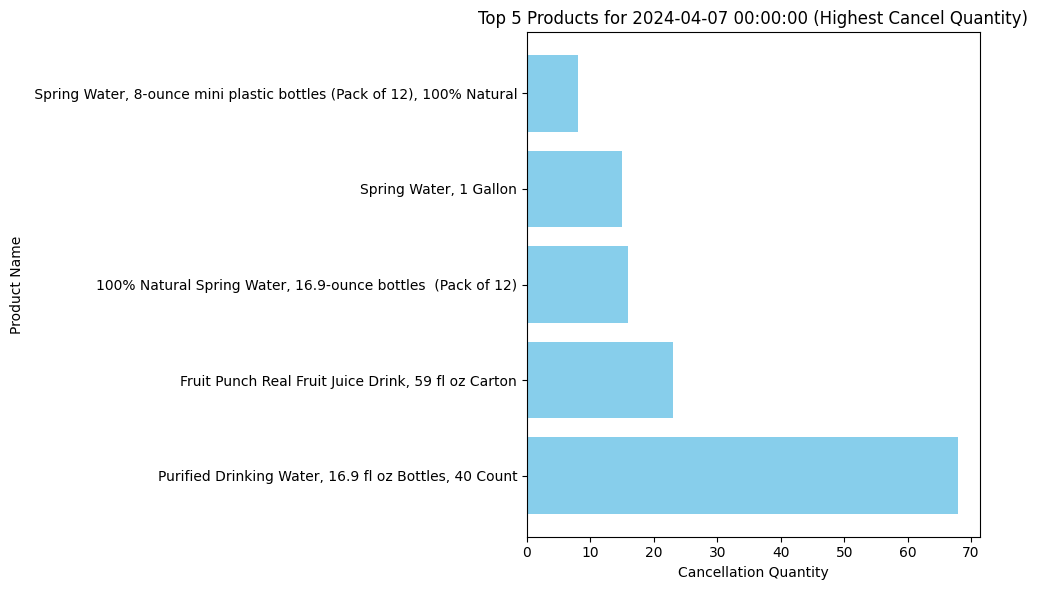

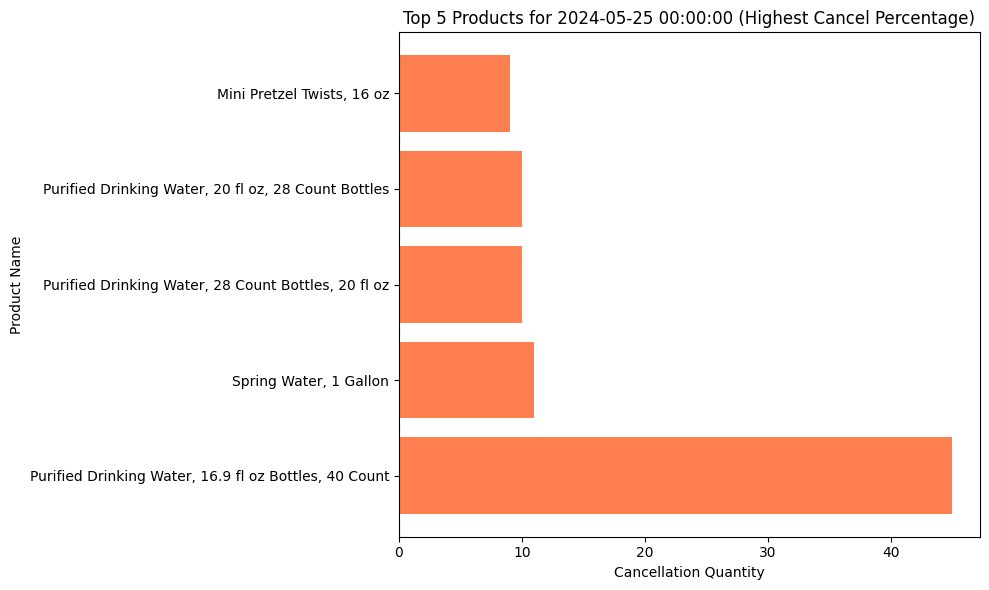

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'PRODUCT_NAME']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Group by Date to calculate total cancel quantity and placed quantity
    day_data = orders_with_product.groupby('ORDER_DT', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    day_data['Cancel_Percentage'] = (day_data['CNCL_QTY'] / day_data['PLCD_QTY']) * 100

    # Find the day with the highest cancellation quantity
    max_cancel_qty_day = day_data.loc[day_data['CNCL_QTY'].idxmax()]

    # Find the day with the highest cancellation percentage
    max_cancel_percentage_day = day_data.loc[day_data['Cancel_Percentage'].idxmax()]

    # Filter data for the day with the highest cancellation quantity
    qty_day_data = orders_with_product[orders_with_product['ORDER_DT'] == max_cancel_qty_day['ORDER_DT']]
    qty_product_data = qty_day_data.groupby('PRODUCT_NAME', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    # Filter data for the day with the highest cancellation percentage
    perc_day_data = orders_with_product[orders_with_product['ORDER_DT'] == max_cancel_percentage_day['ORDER_DT']]
    perc_product_data = perc_day_data.groupby('PRODUCT_NAME', as_index=False).agg({
        'CNCL_QTY': 'sum'
    }).sort_values(by='CNCL_QTY', ascending=False).head(5)

    # Display the results
    print("Day with Highest Cancellation Quantity:")
    print(max_cancel_qty_day)

    print("\nDay with Highest Cancellation Percentage:")
    print(max_cancel_percentage_day)

    # Plot for the top 5 products contributing to the highest cancellation quantity day
    plt.figure(figsize=(10, 6))
    plt.barh(qty_product_data['PRODUCT_NAME'], qty_product_data['CNCL_QTY'], color='skyblue')
    plt.xlabel('Cancellation Quantity')
    plt.ylabel('Product Name')
    plt.title(f'Top 5 Products for {max_cancel_qty_day["ORDER_DT"]} (Highest Cancel Quantity)')
    plt.tight_layout()
    plt.show()

    # Plot for the top 5 products contributing to the highest cancellation percentage day
    plt.figure(figsize=(10, 6))
    plt.barh(perc_product_data['PRODUCT_NAME'], perc_product_data['CNCL_QTY'], color='coral')
    plt.xlabel('Cancellation Quantity')
    plt.ylabel('Product Name')
    plt.title(f'Top 5 Products for {max_cancel_percentage_day["ORDER_DT"]} (Highest Cancel Percentage)')
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'PRODUCT_NAME'.")


<ipython-input-68-4e0c0be7ffe3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['Cancel_Percentage'] = (monthly_data['CNCL_QTY'] / monthly_data['PLCD_QTY']) * 100
<ipython-input-68-4e0c0be7ffe3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['Cancel_Percentage'] = (monthly_data['CNCL_QTY'] / monthly_data['PLCD_QTY']) * 100
<ipython-input-68-4e0c0be7ffe3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c


Month: 2024-02

Top 5 Products by Cancel Quantity:
                                          PRODUCT_NAME  CNCL_QTY
92   Purified Drinking Water, 16.9 fl oz Bottles, 4...     731.0
106  Sparkling Mineral Water Glass Bottles, 12 fl o...     139.0
50   Fruit Punch Real Fruit Juice Drink, 59 fl oz C...     139.0
108                             Spring Water, 1 Gallon     116.0
1     Spring Water, 8-ounce mini plastic bottles (P...      87.0

Top 5 Products by Cancel Percentage:
                                         PRODUCT_NAME  CNCL_QTY  PLCD_QTY  \
36                         Colored Pencil Set, 150 Ct       2.0         2   
85                        Pencil Set, 150 CT, Colored       2.0         2   
25                         Box of Crayons, 120 Colors       2.0         5   
87  Poster Board, 22 in x 28 in, Heavyweight, Blac...       9.0        30   
19  Assorted Multipack Poster Board, 22"x28", 5 Count       2.0         8   

    Cancel_Percentage  
36              100.0  
85       

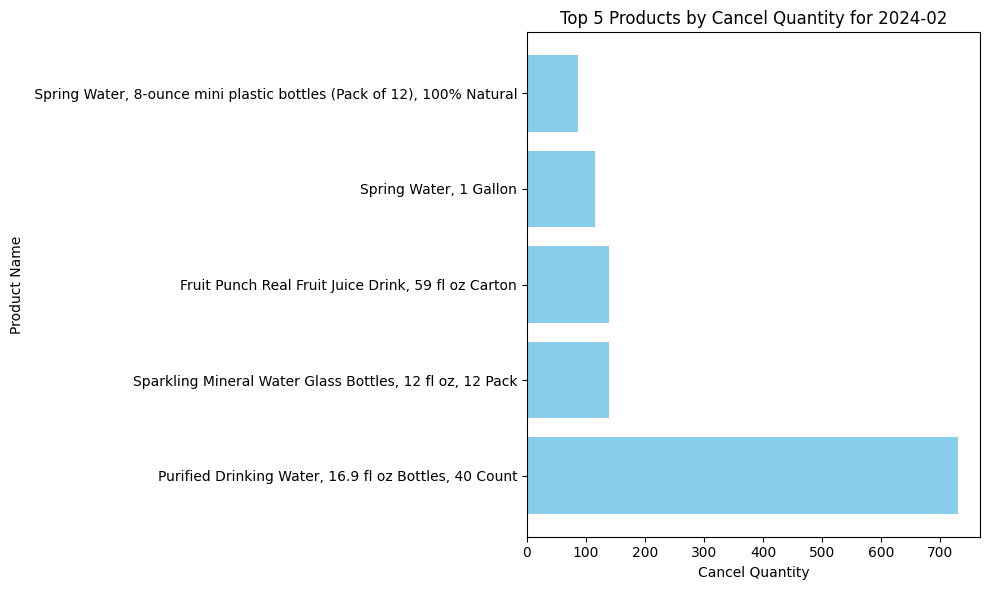

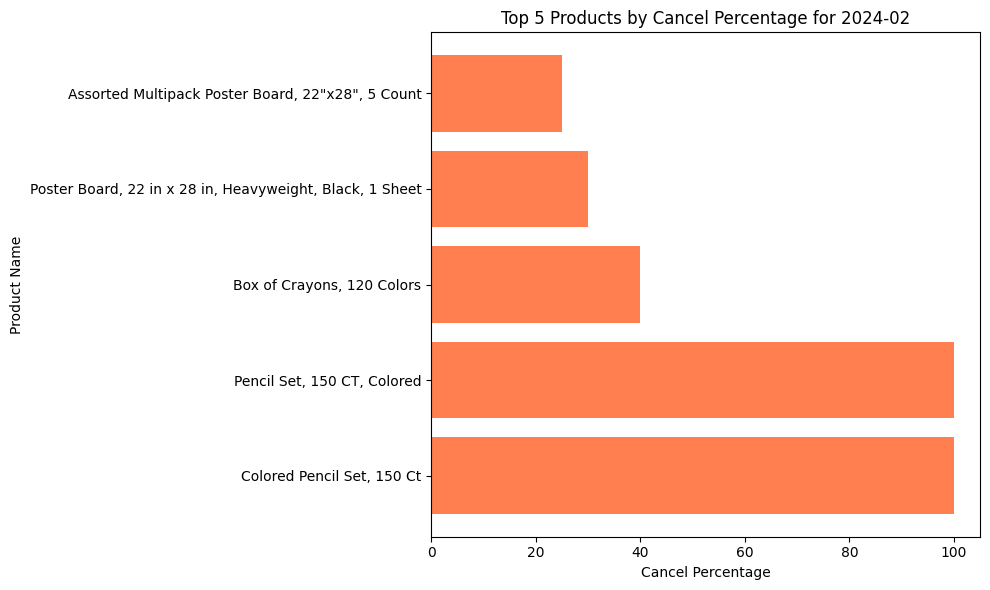


Month: 2024-03

Top 5 Products by Cancel Quantity:
                                          PRODUCT_NAME  CNCL_QTY
104  Purified Drinking Water, 16.9 fl oz Bottles, 4...     776.0
120  Sparkling Mineral Water Glass Bottles, 12 fl o...     161.0
59   Fruit Punch Real Fruit Juice Drink, 59 fl oz C...     147.0
123                             Spring Water, 1 Gallon     144.0
128                    Sweetened Condensed Milk 14 oz.      81.0

Top 5 Products by Cancel Percentage:
                                          PRODUCT_NAME  CNCL_QTY  PLCD_QTY  \
122  Speeders, 1 Die-Cast Toy Car in 1:64 Scale wit...       2.0         2   
34                          Card Game for Family Night       5.0        11   
32                 Car Track Playset, Children Ages 4+       1.0         3   
112  Sand Scents, 8oz Blue Scented Sand, for Kids A...       1.0         4   
61                               Glow-in-the-Dark Glue       1.0         4   

     Cancel_Percentage  
122         100.000000  
3

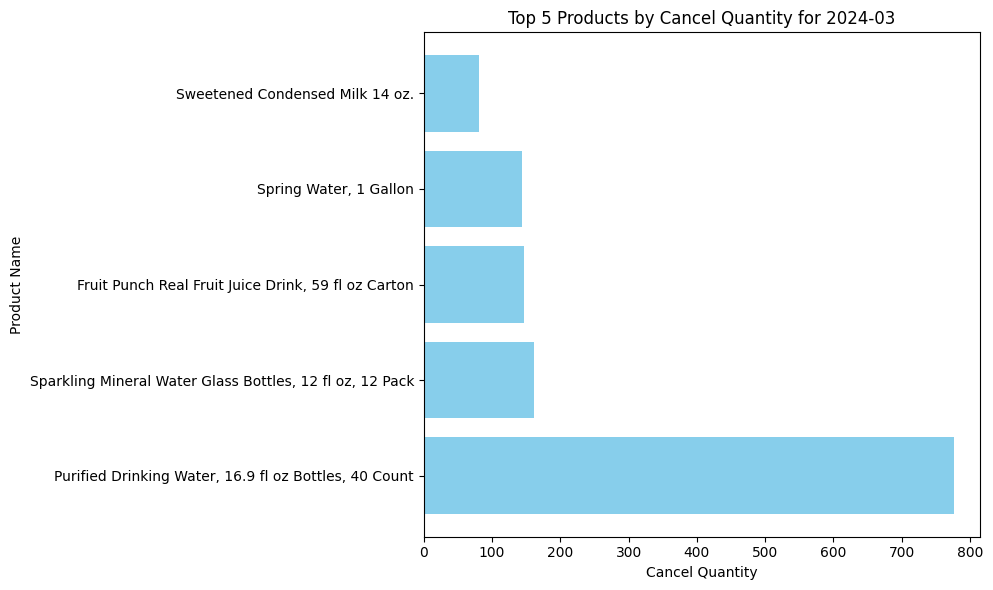

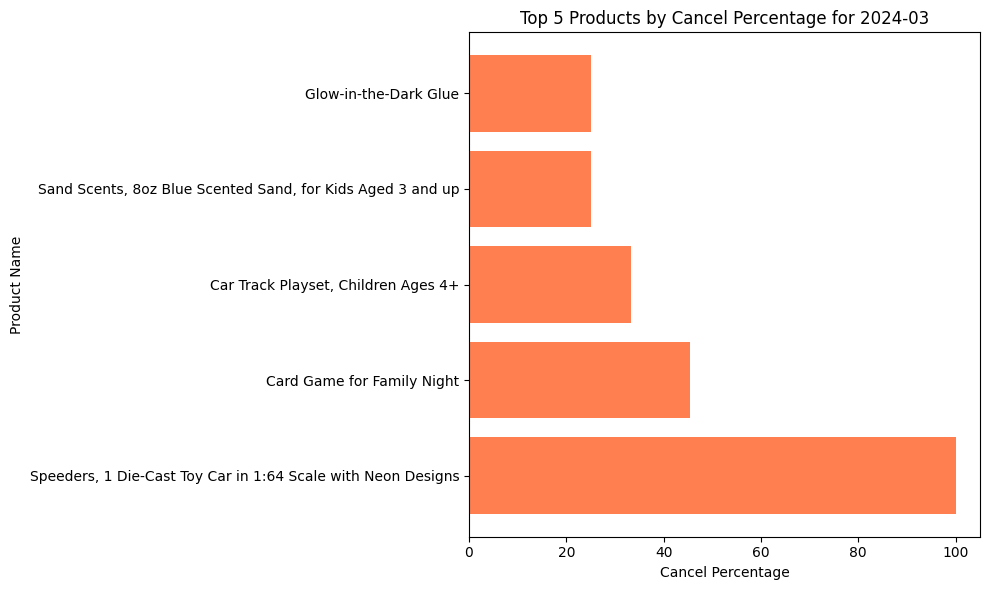


Month: 2024-04

Top 5 Products by Cancel Quantity:
                                          PRODUCT_NAME  CNCL_QTY
104  Purified Drinking Water, 16.9 fl oz Bottles, 4...     887.0
119  Sparkling Mineral Water Glass Bottles, 12 fl o...     174.0
58   Fruit Punch Real Fruit Juice Drink, 59 fl oz C...     164.0
122                             Spring Water, 1 Gallon     130.0
105  Purified Drinking Water, 20 fl oz, 28 Count Bo...      97.0

Top 5 Products by Cancel Percentage:
                                          PRODUCT_NAME  CNCL_QTY  PLCD_QTY  \
15      Advance Strength Tape, 1.88 in x 45 yd, Silver       1.0         2   
97   Plastic Refrigerator Magnets, Assorted Colors,...       3.0         7   
10   30 Piece Plastic Refrigerator Magnets, Assorte...       3.0         7   
137                         White Melting Wafers, 7 oz       8.0        27   
20   Assorted Multipack Poster Board, 22"x28", 5 Count       5.0        17   

     Cancel_Percentage  
15           50.000000  
9

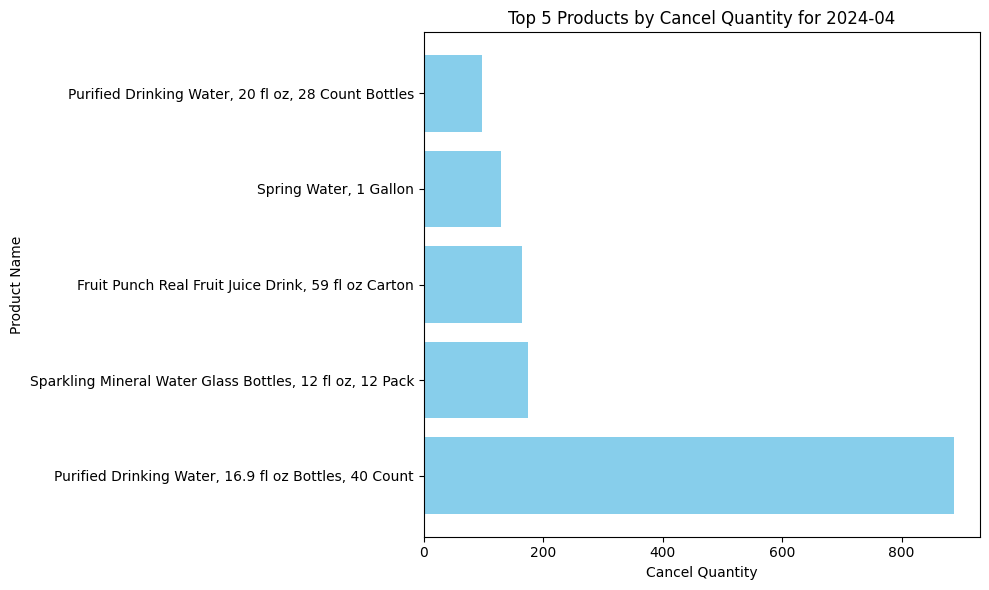

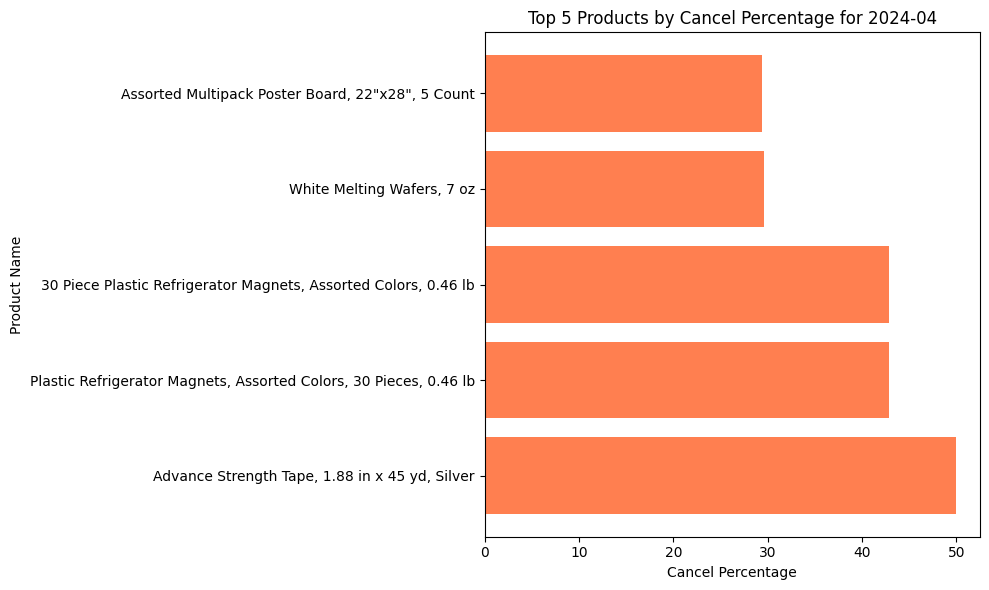


Month: 2024-05

Top 5 Products by Cancel Quantity:
                                          PRODUCT_NAME  CNCL_QTY
103  Purified Drinking Water, 16.9 fl oz Bottles, 4...     860.0
121                             Spring Water, 1 Gallon     132.0
119  Sparkling Mineral Water Glass Bottles, 12 fl o...     117.0
3    100% Natural Spring Water, 8-ounce mini plasti...     107.0
1     Spring Water, 8-ounce mini plastic bottles (P...     107.0

Top 5 Products by Cancel Percentage:
                                          PRODUCT_NAME  CNCL_QTY  PLCD_QTY  \
43   Coloring Book for Kids with Sticker Sheet, Eas...       3.0         4   
20   Assorted Multipack Poster Board, 22"x28", 5 Count      13.0        21   
33                          Card Game for Family Night       1.0         2   
106                               Quidditch Board Game       1.0         2   
49                 Die-Cast Vehicle Assortment, 5 Pack       1.0         3   

     Cancel_Percentage  
43           75.000000  
2

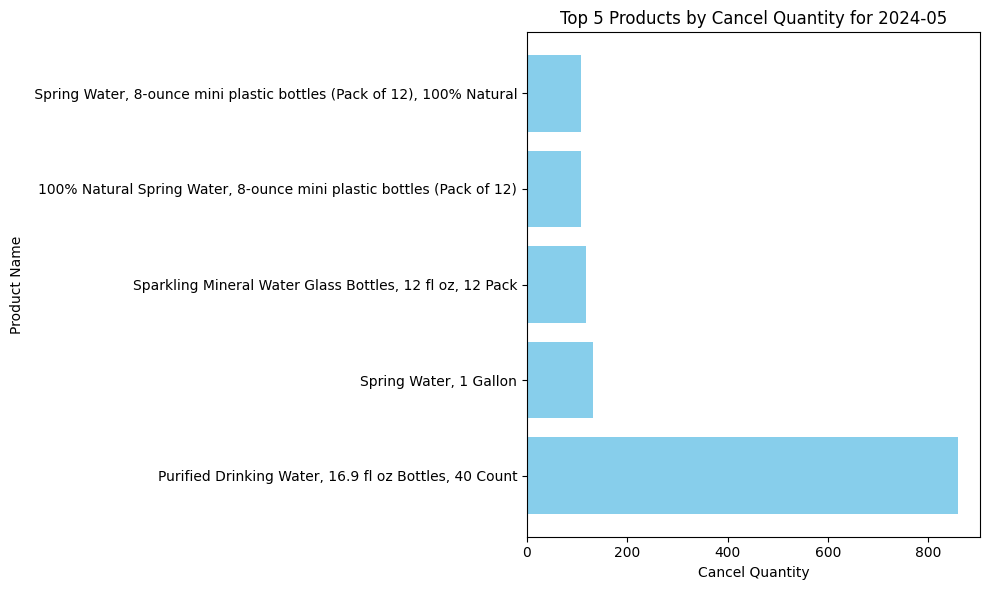

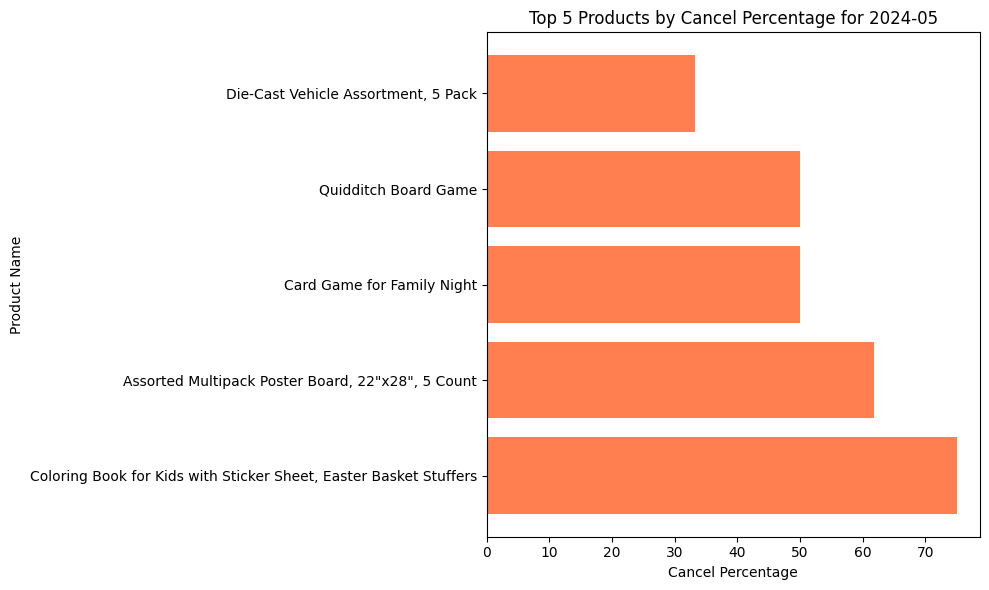


Month: 2024-06

Top 5 Products by Cancel Quantity:
                                          PRODUCT_NAME  CNCL_QTY
97   Purified Drinking Water, 16.9 fl oz Bottles, 4...     772.0
112  Sparkling Mineral Water Glass Bottles, 12 fl o...     131.0
115                             Spring Water, 1 Gallon     125.0
1     Spring Water, 8-ounce mini plastic bottles (P...     109.0
3    100% Natural Spring Water, 8-ounce mini plasti...     109.0

Top 5 Products by Cancel Percentage:
                                          PRODUCT_NAME  CNCL_QTY  PLCD_QTY  \
117  Sticky Notes, Lined, 4 in x 4 in, Assorted Bri...       1.0         1   
114  Speeders, 1 Die-Cast Toy Car in 1:64 Scale wit...       5.0         5   
101                       Real Brewed Tea - Sweetened       11.0        20   
20   Assorted Multipack Poster Board, 22"x28", 5 Count       6.0        11   
42   Coloring Book for Kids with Sticker Sheet, Eas...       6.0        13   

     Cancel_Percentage  
117         100.000000  
1

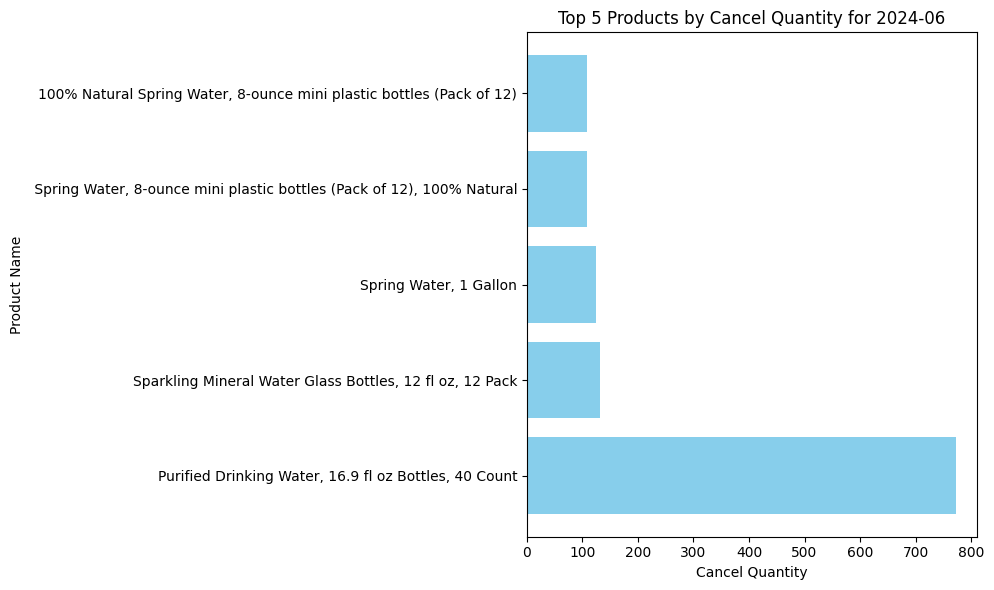

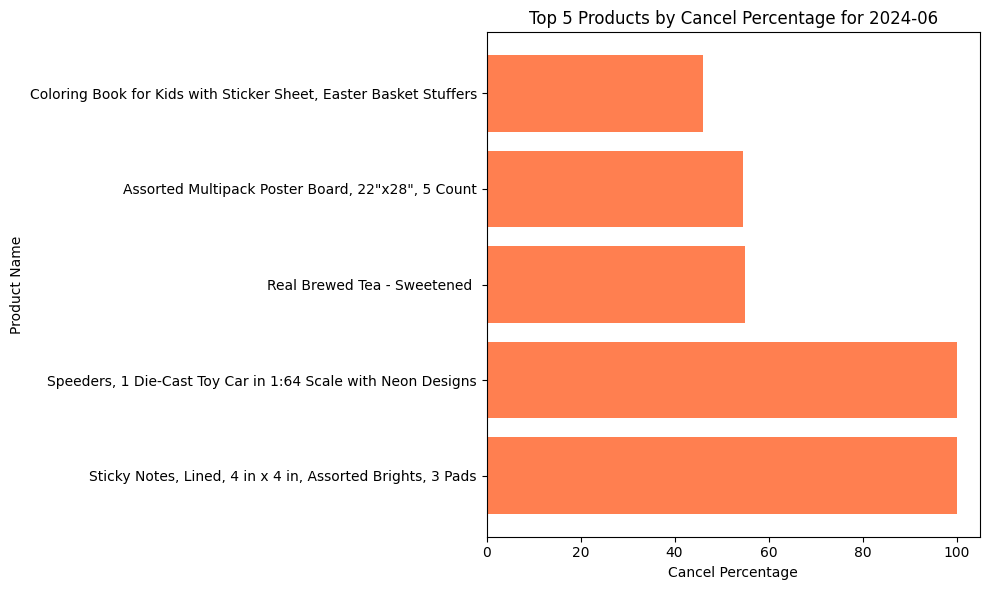

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'PRODUCT_NAME']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract Year-Month for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Group by YearMonth to calculate total cancel quantity and placed quantity
    month_data = orders_with_product.groupby('YearMonth', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate cancellation percentage
    month_data['Cancel_Percentage'] = (month_data['CNCL_QTY'] / month_data['PLCD_QTY']) * 100

    # Create a list to store the results
    monthly_results = []

    for month in month_data['YearMonth']:
        # Filter data for the current month
        monthly_data = orders_with_product[orders_with_product['YearMonth'] == month]

        # Group by product for the highest cancellation quantity
        qty_product_data = monthly_data.groupby('PRODUCT_NAME', as_index=False).agg({
            'CNCL_QTY': 'sum'
        }).sort_values(by='CNCL_QTY', ascending=False).head(5)

        # Calculate cancel percentage for products
        monthly_data['Cancel_Percentage'] = (monthly_data['CNCL_QTY'] / monthly_data['PLCD_QTY']) * 100

        # Group by product for the highest cancellation percentage
        perc_product_data = monthly_data.groupby('PRODUCT_NAME', as_index=False).agg({
            'CNCL_QTY': 'sum',
            'PLCD_QTY': 'sum'
        })
        perc_product_data['Cancel_Percentage'] = (perc_product_data['CNCL_QTY'] / perc_product_data['PLCD_QTY']) * 100
        perc_product_data = perc_product_data.sort_values(by='Cancel_Percentage', ascending=False).head(5)

        # Append results for the current month
        monthly_results.append({
            'Month': month,
            'Top_Cancel_Qty_Products': qty_product_data,
            'Top_Cancel_Percentage_Products': perc_product_data
        })

    # Display results for each month
    for result in monthly_results:
        print(f"\nMonth: {result['Month']}")

        print("\nTop 5 Products by Cancel Quantity:")
        print(result['Top_Cancel_Qty_Products'])

        print("\nTop 5 Products by Cancel Percentage:")
        print(result['Top_Cancel_Percentage_Products'])

        # Plot the results
        # Cancel Quantity Products
        plt.figure(figsize=(10, 6))
        plt.barh(result['Top_Cancel_Qty_Products']['PRODUCT_NAME'], result['Top_Cancel_Qty_Products']['CNCL_QTY'], color='skyblue')
        plt.xlabel('Cancel Quantity')
        plt.ylabel('Product Name')
        plt.title(f"Top 5 Products by Cancel Quantity for {result['Month']}")
        plt.tight_layout()
        plt.show()

        # Cancel Percentage Products
        plt.figure(figsize=(10, 6))
        plt.barh(result['Top_Cancel_Percentage_Products']['PRODUCT_NAME'], result['Top_Cancel_Percentage_Products']['Cancel_Percentage'], color='coral')
        plt.xlabel('Cancel Percentage')
        plt.ylabel('Product Name')
        plt.title(f"Top 5 Products by Cancel Percentage for {result['Month']}")
        plt.tight_layout()
        plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY', 'PRODUCT_NAME'.")


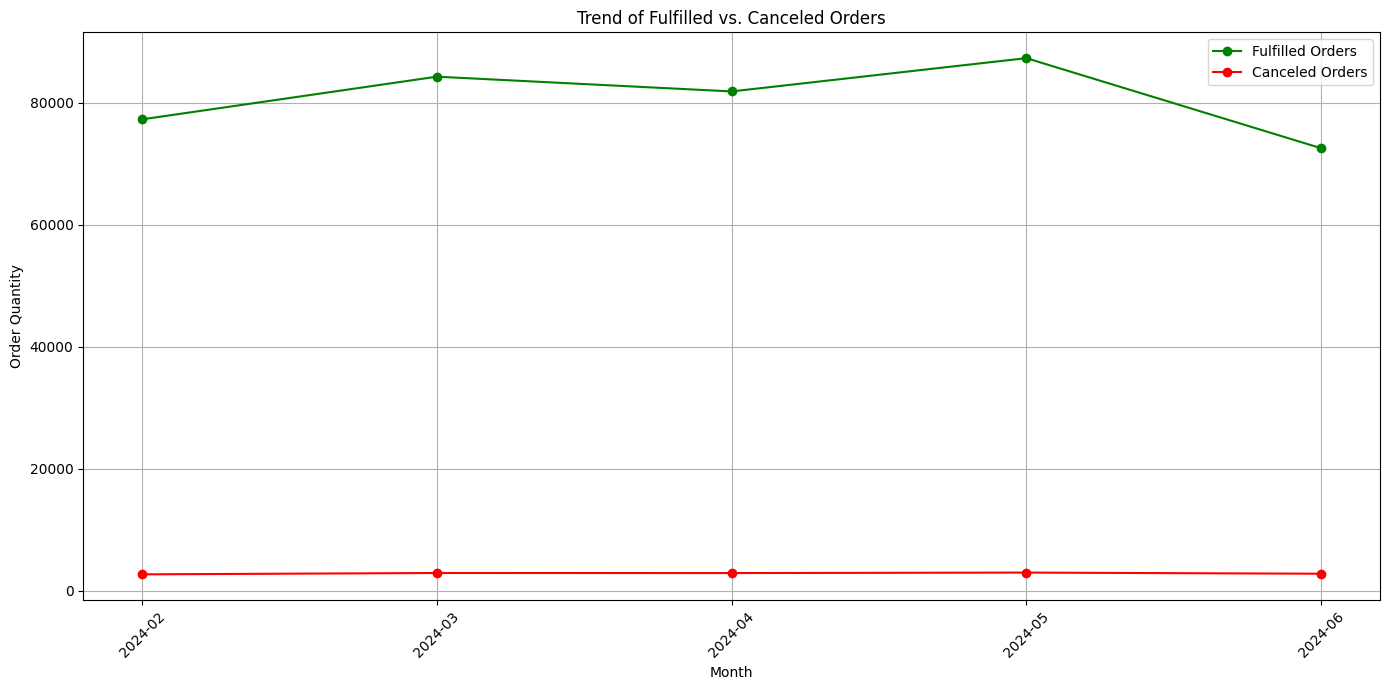

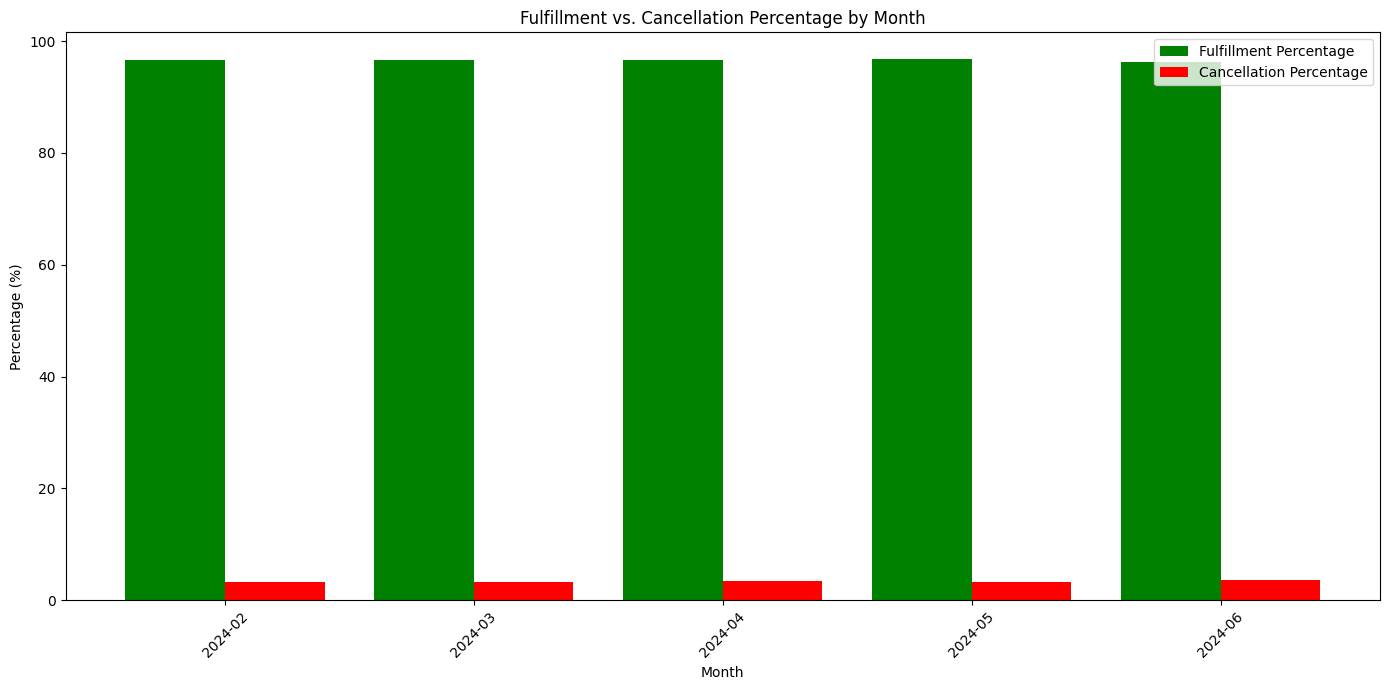

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract Year-Month for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Calculate fulfilled orders
    orders_with_product['FULF_QTY'] = orders_with_product['PLCD_QTY'] - orders_with_product['CNCL_QTY']

    # Group by YearMonth to calculate total canceled and fulfilled orders
    fulfillment_data = orders_with_product.groupby('YearMonth', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'FULF_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate the percentage of fulfilled and canceled orders
    fulfillment_data['Fulfillment_Percentage'] = (fulfillment_data['FULF_QTY'] / fulfillment_data['PLCD_QTY']) * 100
    fulfillment_data['Cancellation_Percentage'] = (fulfillment_data['CNCL_QTY'] / fulfillment_data['PLCD_QTY']) * 100

    # Line chart showing the trend of fulfilled vs. canceled orders
    plt.figure(figsize=(14, 7))
    plt.plot(fulfillment_data['YearMonth'], fulfillment_data['FULF_QTY'], marker='o', label='Fulfilled Orders', color='green')
    plt.plot(fulfillment_data['YearMonth'], fulfillment_data['CNCL_QTY'], marker='o', label='Canceled Orders', color='red')
    plt.title('Trend of Fulfilled vs. Canceled Orders')
    plt.xlabel('Month')
    plt.ylabel('Order Quantity')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Percentage chart comparing fulfilled and canceled orders
    plt.figure(figsize=(14, 7))
    bar_width = 0.4
    x = range(len(fulfillment_data['YearMonth']))
    plt.bar(x, fulfillment_data['Fulfillment_Percentage'], width=bar_width, label='Fulfillment Percentage', color='green')
    plt.bar([i + bar_width for i in x], fulfillment_data['Cancellation_Percentage'], width=bar_width, label='Cancellation Percentage', color='red')
    plt.xticks([i + bar_width / 2 for i in x], fulfillment_data['YearMonth'], rotation=45)
    plt.title('Fulfillment vs. Cancellation Percentage by Month')
    plt.xlabel('Month')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY'.")


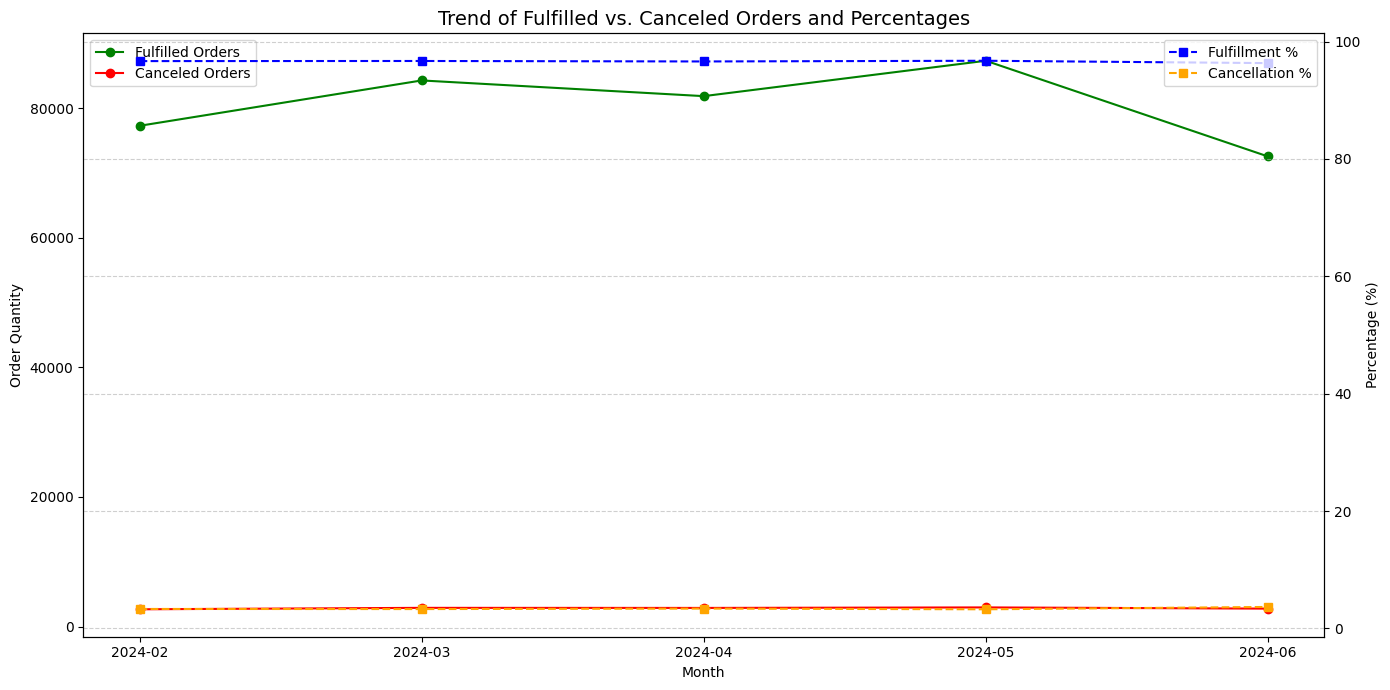

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_QTY', 'PLCD_QTY']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Extract Year-Month for grouping
    orders_with_product['YearMonth'] = orders_with_product['ORDER_DT'].dt.to_period('M').astype(str)

    # Calculate fulfilled orders
    orders_with_product['FULF_QTY'] = orders_with_product['PLCD_QTY'] - orders_with_product['CNCL_QTY']

    # Group by YearMonth to calculate total canceled and fulfilled orders
    fulfillment_data = orders_with_product.groupby('YearMonth', as_index=False).agg({
        'CNCL_QTY': 'sum',
        'FULF_QTY': 'sum',
        'PLCD_QTY': 'sum'
    })

    # Calculate the percentage of fulfilled and canceled orders
    fulfillment_data['Fulfillment_Percentage'] = (fulfillment_data['FULF_QTY'] / fulfillment_data['PLCD_QTY']) * 100
    fulfillment_data['Cancellation_Percentage'] = (fulfillment_data['CNCL_QTY'] / fulfillment_data['PLCD_QTY']) * 100

    # Dual-axis plot for trends of fulfilled vs. canceled orders and percentages
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot Fulfilled and Canceled Order Quantities
    ax1.plot(fulfillment_data['YearMonth'], fulfillment_data['FULF_QTY'], marker='o', label='Fulfilled Orders', color='green')
    ax1.plot(fulfillment_data['YearMonth'], fulfillment_data['CNCL_QTY'], marker='o', label='Canceled Orders', color='red')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Order Quantity', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))

    # Secondary Y-axis for Percentages
    ax2 = ax1.twinx()
    ax2.plot(fulfillment_data['YearMonth'], fulfillment_data['Fulfillment_Percentage'], marker='s', linestyle='--', color='blue', label='Fulfillment %')
    ax2.plot(fulfillment_data['YearMonth'], fulfillment_data['Cancellation_Percentage'], marker='s', linestyle='--', color='orange', label='Cancellation %')
    ax2.set_ylabel('Percentage (%)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

    # Title and layout adjustments
    plt.title('Trend of Fulfilled vs. Canceled Orders and Percentages', fontsize=14)
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_QTY', 'PLCD_QTY'.")


Top 3 Cancellation Reasons for Product Category: NON FLAVORED WATER
            CNCL_RSN_DESC  Lost_Revenue
13           Out Of Stock       16161.5
3   Customer Cancellation       11712.8
7                 Expired        2366.1


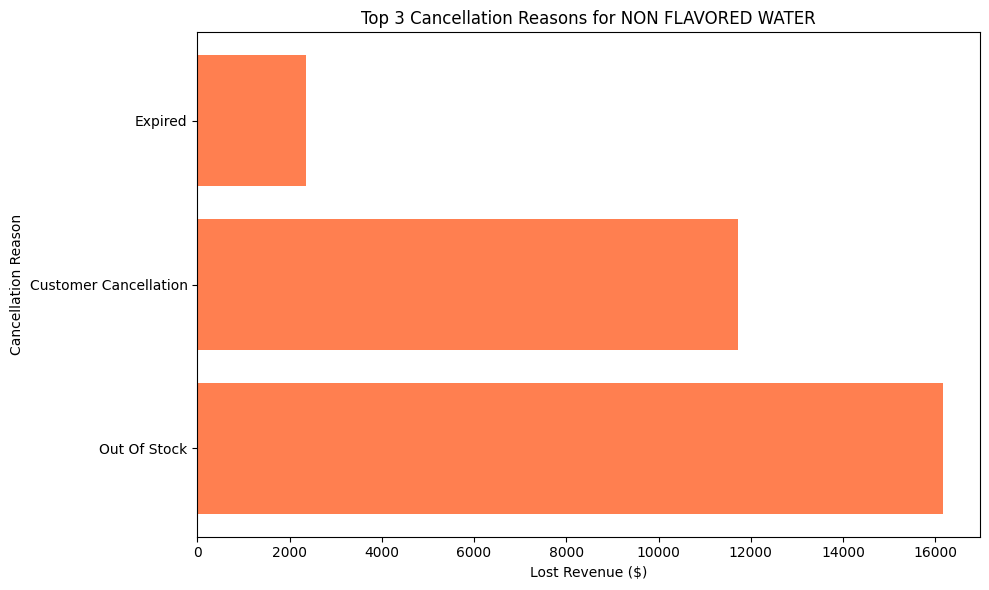

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['ORDER_DT', 'CNCL_AMT', 'CATEGORY', 'CNCL_RSN_DESC']):
    # Convert ORDER_DT to datetime if not already
    orders_with_product['ORDER_DT'] = pd.to_datetime(orders_with_product['ORDER_DT'])

    # Calculate lost revenue due to cancellations (sum of CNCL_AMT)
    orders_with_product['Lost_Revenue'] = orders_with_product['CNCL_AMT']

    # Group by product category to calculate total lost revenue
    category_revenue_loss = orders_with_product.groupby('CATEGORY', as_index=False).agg({
        'Lost_Revenue': 'sum'
    }).sort_values(by='Lost_Revenue', ascending=False)

    # Identify the product category with the highest lost revenue
    top_category = category_revenue_loss.iloc[0]['CATEGORY']

    # Filter data for the top product category
    top_category_data = orders_with_product[orders_with_product['CATEGORY'] == top_category]

    # Group by cancellation reason to calculate total lost revenue
    top_category_reasons = top_category_data.groupby('CNCL_RSN_DESC', as_index=False).agg({
        'Lost_Revenue': 'sum'
    }).sort_values(by='Lost_Revenue', ascending=False).head(3)

    # Display the results
    print(f"Top 3 Cancellation Reasons for Product Category: {top_category}")
    print(top_category_reasons)

    # Plot bar chart for top 3 cancellation reasons
    plt.figure(figsize=(10, 6))
    plt.barh(top_category_reasons['CNCL_RSN_DESC'], top_category_reasons['Lost_Revenue'], color='coral')
    plt.xlabel('Lost Revenue ($)')
    plt.ylabel('Cancellation Reason')
    plt.title(f'Top 3 Cancellation Reasons for {top_category}')
    plt.tight_layout()
    plt.show()

else:
    print("The dataframe does not contain the required columns: 'ORDER_DT', 'CNCL_AMT', 'CATEGORY', 'CNCL_RSN_DESC'.")


In [ ]:
import pandas as pd

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['STORE_NUM', 'STATE', 'CNCL_RSN_DESC']):
    # Filter data for Alpine store in IL
    alpine_data = orders_with_product[(orders_with_product['CITY'] == 'Alpine') &
                                      (orders_with_product['STATE'] == 'IL')]

    # Group by cancellation reason to count occurrences
    reason_counts = alpine_data.groupby('CNCL_RSN_DESC', as_index=False).agg({
        'CNCL_AMT': 'sum'
    }).sort_values(by='CNCL_AMT', ascending=False).head(3)

    # Display the top 3 reasons
    print("Top 3 Cancellation Reasons for Alpine Store in IL:")
    print(reason_counts)

else:
    print("The dataframe does not contain the required columns: 'STORE_NUM', 'STATE', 'CNCL_RSN_DESC'.")


Top 3 Cancellation Reasons for Alpine Store in IL:
                             CNCL_RSN_DESC  CNCL_AMT
11                            Out Of Stock   6225.18
2                    Customer Cancellation   4253.29
15  Store Delivery Order Returned To Store   1126.49


In [ ]:
import pandas as pd

# Ensure the dataframe contains the necessary columns for analysis
if all(col in orders_with_product.columns for col in ['CITY', 'STATE', 'PLCD_QTY']):
    # Group by city and state to calculate total orders
    city_state_orders = orders_with_product.groupby(['CITY', 'STATE'], as_index=False).agg({
        'PLCD_QTY': 'sum'
    }).sort_values(by='PLCD_QTY', ascending=False)

    # Find the city and state with the highest orders
    highest_orders = city_state_orders.iloc[0]

    # Display the result
    print("City and State with the Highest Orders:")
    print(f"City: {highest_orders['CITY']}, State: {highest_orders['STATE']}")
    print(f"Total Orders: {highest_orders['PLCD_QTY']}")

else:
    print("The dataframe does not contain the required columns: 'CITY', 'STATE', 'PLCD_QTY'.")


City and State with the Highest Orders:
City: Alpine, State: IL
Total Orders: 103162
